In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

df = pd.read_csv('Dataset .csv')

In [3]:
# Checking for first five rows

df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

# LEVEL 1

# Task1 : Data Exploration and Preprocessing

## Explore the dataset and identify the number of rows and columns.

In [4]:
df.shape

# INFERENCE
# The data has 9551 rows and 21 columns

(9551, 21)

# DATA PREPROCESSING

# Check for missing values in each column and handle them accordingly.

In [5]:
# IDENTIFYING NULL VALUES AND MISSING VALUES

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# INFERENCE 

## 9 null values were identified in the Cuisines column and can be replaced with mode 


In [6]:
df['Cuisines']= df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [7]:
# Successfully removed all null values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
# CHECKING OUT FOR ANY SPECIAL CHARACTERS OR UNIQUE VALUES

for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for {column}: {unique_values}')
    print()
    


Unique values for Restaurant ID: [6317637 6304287 6300002 ... 5915807 5916112 5927402]

Unique values for Restaurant Name: ['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A���k Kahve' "Walter's Coffee Roastery"]

Unique values for Country Code: [162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]

Unique values for City: ['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Bras�_lia'
 'Rio de Janeiro' 'S��o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo 

In [9]:
#INFERENCE

# There are a lot of special character strings with �. Some of the text can be deduced by general knowledge but most
# of the words are unknown to replace. 

# Only replacing the pounds special character with pounds symbol and leaving rest as they are

In [10]:
# REPLACING POUNDS SPECIAL CHARACTER INTO POUNDS SYMBOL

special_character=['Pounds(��)']

for i in special_character:
# Replace the special character with an empty string
    df.Currency=df.Currency.replace(i,'Pounds(££)')
# Print the string after the removal of special 

In [11]:
# SUCCESSFUL REPLACEMENT OF THE SPECIAL CHARACTER

df["Currency"].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(££)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [12]:
# ANOTHER METHOD TO REPLACE THE SPECIAL CHARACTER IN STRING


df.loc[df['City'].str.contains('�_')]['City'].head(5)

22    Bras�_lia
23    Bras�_lia
24    Bras�_lia
25    Bras�_lia
26    Bras�_lia
Name: City, dtype: object

In [13]:
df.loc[df['City'] == 'Bras�_lia','City'] = 'Brasilia'


# CHECKING FOR DUPLICATES

In [14]:
# There are no duplicated rows

df.duplicated().sum()

0

In [15]:
# Ensuring all the columns are being displayed

pd.set_option('display.max_columns', None)
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776      

In [16]:
# Checking the data types for all columns

df.info()


# All columns seem to have the appropriate data type
# Latitude and longitude are decimals so a float type is appropriate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Perform data type conversion if necessary.
# Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [17]:
# EXPLORING THE TARGET VARIABLE - AGGREGATE RATING

df['Aggregate rating'].unique()



array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [18]:
# TARGET DISTRIBUTION

# CHECKING THE VALUE COUNTS OF TARGET COLUMNS

df['Aggregate rating'].value_counts().sort_values(ascending = False)

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [19]:
def rating(x):
    if( x == 0.0 ):
        return '0'
    if( 0.1 < x < 1.1 ):
        return "0-1"
    if( 1.0 < x < 2.1 ):
        return "1-2"
    if( 2.0 < x < 3.1 ):
        return "2-3"
    if( 3.0 < x < 4.1 ):
        return "3-4"
    else:
        return "4-5"

df['rating_cat'] = df['Aggregate rating'].apply(rating)

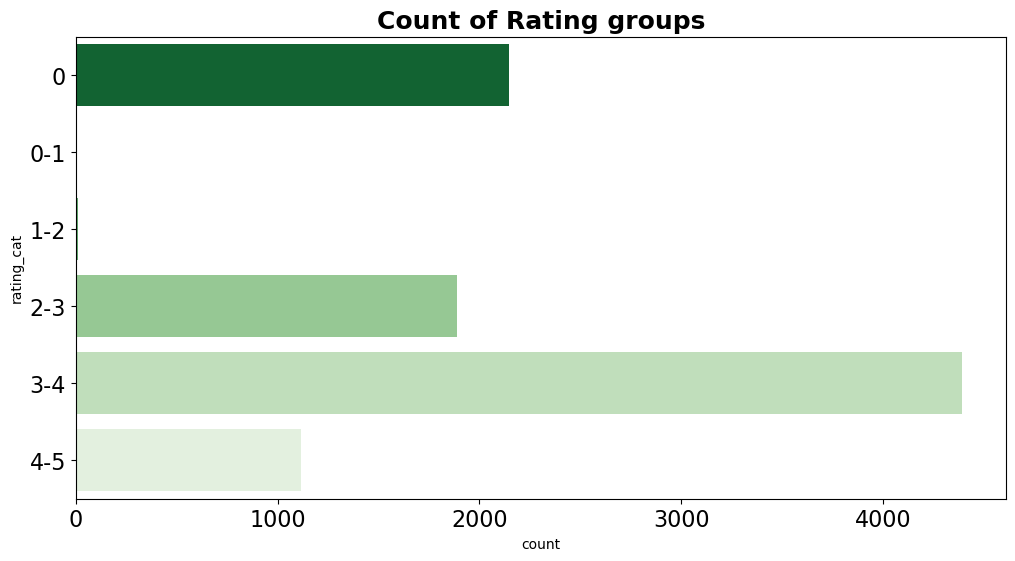

In [20]:
plt.figure(figsize=(12,6))
rating_list = ['0',"0-1","1-2","2-3","3-4","4-5"]
sns.countplot(df['Aggregate rating'].value_counts(),y = df['rating_cat'], palette='Greens_r', order = rating_list)
plt.title('Count of Rating groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


In [21]:
# GROUP BY AGGREGATE RATING and renaming the new column as Rating for individual visualisation

df.groupby('Aggregate rating').size().reset_index()
num_rating = df.groupby('Aggregate rating').size().reset_index().rename(columns={0:'Rating Count'})
num_rating


Aggregate rating  Rating Count
0                0.0          2148
1                1.8             1
2                1.9             2
3                2.0             7
4                2.1            15
5                2.2            27
6                2.3            47
7                2.4            87
8                2.5           110
9                2.6           191
10               2.7           250
11               2.8           315
12               2.9           381
13               3.0           468
14               3.1           519
15               3.2           522
16               3.3           483
17               3.4           498
18               3.5           480
19               3.6           458
20               3.7           427
21               3.8           400
22               3.9           335
23               4.0           266
24               4.1           274
25               4.2           221
26               4.3           174
27               4.4           144
28               4.5            95
29               4.6            78
30               4.7            42
31               4.8            25
32               4.9            61

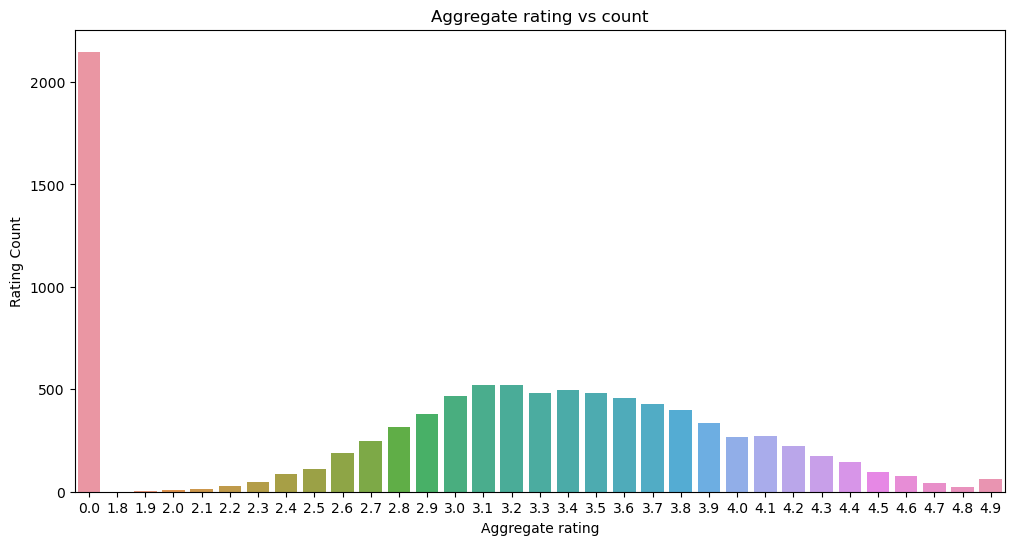

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x= 'Aggregate rating', y='Rating Count', data= num_rating)
plt.title('Aggregate rating vs count')
plt.show()

In [23]:
# INFERENCE:
    
# # 1. Rating 0 has the highest count meaning lot out of 9550 rows, 2148 have no ratings.
# 2.20% of the restaurants have 0 rating
# 3.Out of the six classes there are no values in the 0-1 range at all
# 4. 2-3% of ratings are between 1-2 range
# 5. Most of the restaurants are rated between 3-4 about 40% 
# 6. 20% of restaurants are rated 2-3
# 7. 10% of restaurants are rated 4-5 

# There is huge imbalance in the target classes as two classes have 0-2% ratings 
# whilst three classes have 80% of rating 

# LEVEL 1 : TASK 2: DESCRIPTIVE ANALYSIS

# Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

In [24]:
df.describe().T

count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.719196e+01  7.728201e+01  1.748321e+02  
Latitude                  28.478713  2.857047e+01  2.864276e+01  5.597698e+01  
Average Cost for two     250.000000  4.000000e+02  7.000000e+02  8.000000e+05  
Price range                1.000000  2.000000e+00  2.000000e+00  4.000000e+00  
Aggregate rating           2.500000  3.200000e+00  3.700000e+00  4.900000e+00  
Votes                      5.000000  3.100000e+01  1.310000e+02  1.093400e+04

In [25]:
# INSIGHTS

# 1. Only 8 features are numerical and four are constants for example :Restaurant ID, Country Code, Longitude , Latitude
# 2. Average cost for two averages at 1199.211 but again as all the currencies vary it does not explain much
# 3. Similarly price range also is not explanatory given the currency is different
# 4. The target aggregate rating averages at 2.66 with minimum of 0 and maximum of 4.9 covering the whole scale though
# there are imbalances in three categories of ratings
# 5. Votes for the ratings range from 0 -10934 
    

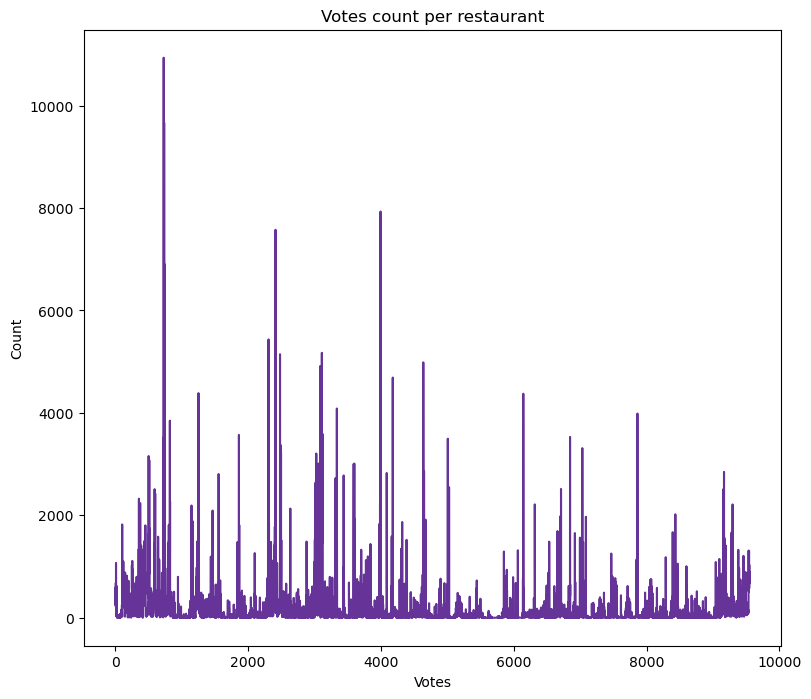

In [26]:
# Visualising the votes column for each restaurant as this could be a direct impact on the aggregate ratings

plt.figure(figsize=(9,8))
plt.plot(df['Votes'],color = 'rebeccapurple')
plt.xlabel("Votes")
plt.ylabel("Count")
plt.title("Votes count per restaurant")
plt.show()




In [27]:
def votes_count(x):
    if( 0 < x < 301 ):
        return '0-300'
    if( 300 < x < 1001 ):
        return "300-1000"
    if( 1000 < x < 3001 ):
        return "1000-3000"
    if( 3000 < x < 5001 ):
        return "3000-5000"
    else:
        return "5000-10000"

df['votes_count'] = df['Votes'].apply(votes_count)

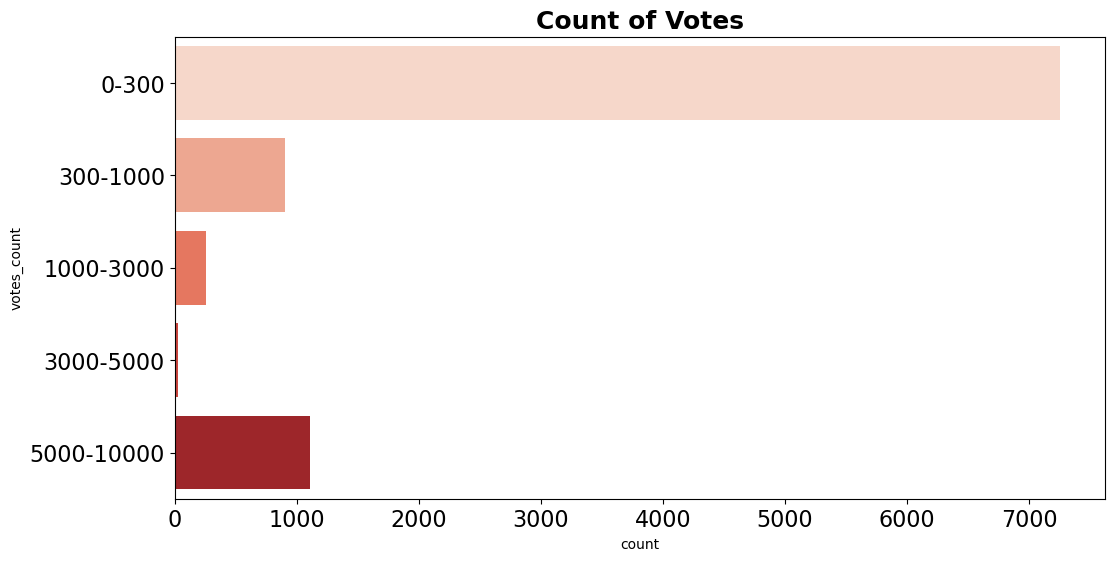

In [28]:
plt.figure(figsize=(12,6))
votes_list = ['0-300',"300-1000","1000-3000","3000-5000","5000-10000"]
sns.countplot(df['Votes'].value_counts(),y = df['votes_count'], palette='Reds', order = votes_list)
plt.title('Count of Votes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [29]:
# # INSIGHTS

# 1. 70% of votes are under 300 per restaurant
# 2. 10% of votes are around 5000-10000 and  300-1000
# 3. Rest of the categories hardly have 5% or less votes



4.0

# Explore the distribution of categorical variables like "Country Code," "City," and "Cuisines."


In [30]:
# Grouping country code and rating and counting the number of ratings per country code and rating

Country_Code_Rating = df.groupby(['Aggregate rating','Country Code']).size().reset_index().sort_values(by='Aggregate rating',ascending=False).rename(columns={0:'Rating By Country Code'})
Country_Code_Rating

Aggregate rating  Country Code  Rating By Country Code
221               4.9           216                      14
215               4.9           166                       1
211               4.9            30                       3
212               4.9            94                       4
213               4.9           148                       2
..                ...           ...                     ...
4                 1.8             1                       1
2                 0.0           215                       1
1                 0.0            30                       5
3                 0.0           216                       3
0                 0.0             1                    2139

[222 rows x 3 columns]

In [31]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [32]:
len(df['Country Code'].value_counts())

# There are 15 Countries with unique country codes

15

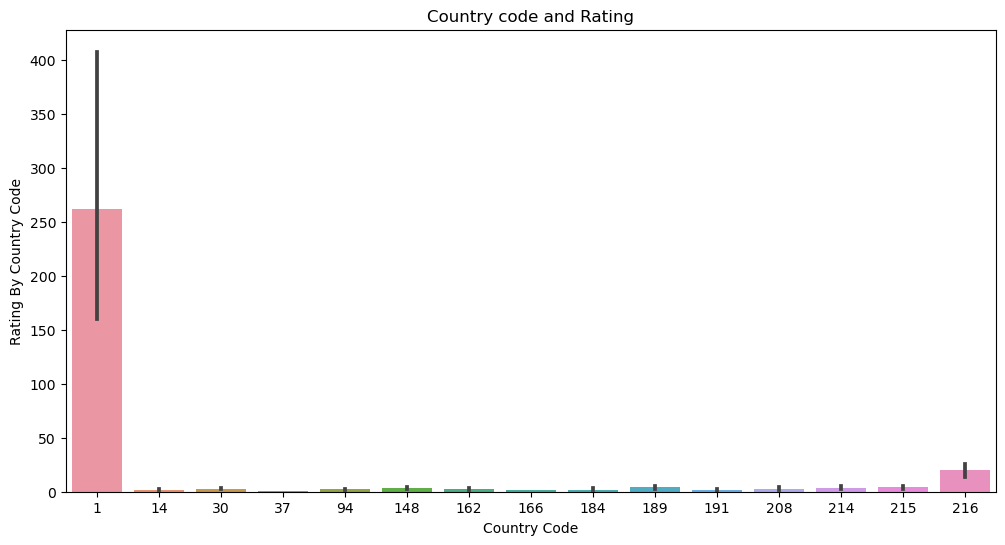

In [33]:
# Visualising the country code distribution with number of ratings with groupby of Country code and aggregate rating


plt.figure(figsize = (12,6))
sns.barplot(x= 'Country Code', y= "Rating By Country Code", data= Country_Code_Rating)
plt.title ("Country code and Rating")
plt.show()



# INSIGHTS


# Country code 1 has the highest value count followed by 216
# The other countries have less than 30 rating by country code

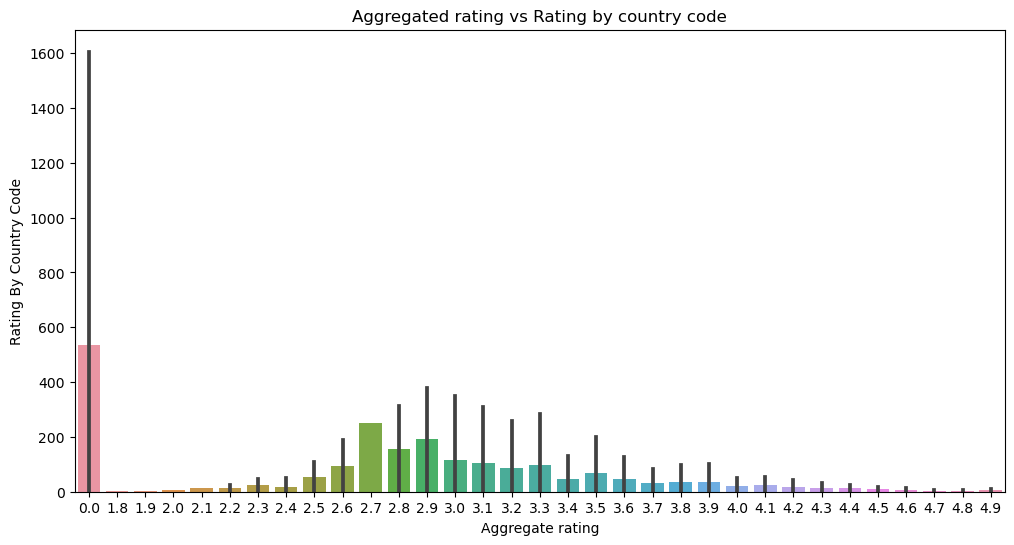

In [34]:
# Visualising the Aggregate rating distribution with number of ratings per country code and aggregate ratings


plt.figure(figsize = (12,6))
sns.barplot(x= "Aggregate rating", y= "Rating By Country Code", data= Country_Code_Rating)
plt.title ("Aggregated rating vs Rating by country code")
plt.show()

# INSIGHTS

# As seen earlier, most of the aggregate rating are 0
# Rest of them are distributed between 2.7 and 3.6 aggregate ratings

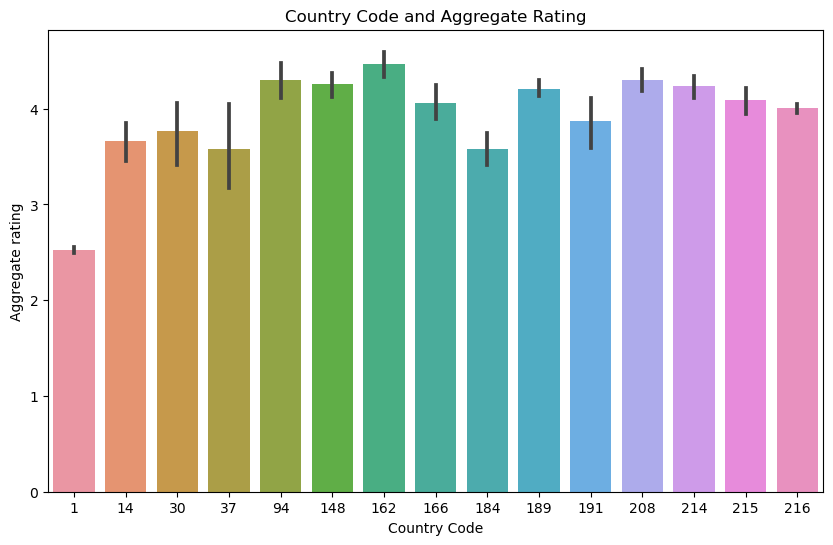

In [35]:
# Visualising Country code and aggregated ratings

plt.figure(figsize = (10,6))
sns.barplot(x= 'Country Code', y= "Aggregate rating", data= df)
plt.title('Country Code and Aggregate Rating')
plt.show()


# INSIGHTS

# 1. Country code 1 has the highest number of ratings in terms of count but the lowest by rating averaging at 2.6
# 2. Country code 216 came second in number of ratings has a above average rating of around 3.9 
# 3. COuntry code 162 has the highest rating of 4.9
# 4. Most of the other countries average aroung 3-4 rating 

In [36]:
# Grouping by City and rating in descending order of the mean rating per city

City_rating = df.groupby(['City'],as_index=False)['Aggregate rating'].mean().sort_values('Aggregate rating', ascending = False).reset_index()
City_rating

index              City  Aggregate rating
0       56        Inner City          4.900000
1      107       Quezon City          4.800000
2       73       Makati City          4.650000
3       95        Pasig City          4.633333
4       75  Mandaluyong City          4.625000
..     ...               ...               ...
136     88         New Delhi          2.438845
137     83         Montville          2.400000
138     78         Mc Millan          2.400000
139     89             Noida          2.036204
140     43         Faridabad          1.866932

[141 rows x 3 columns]

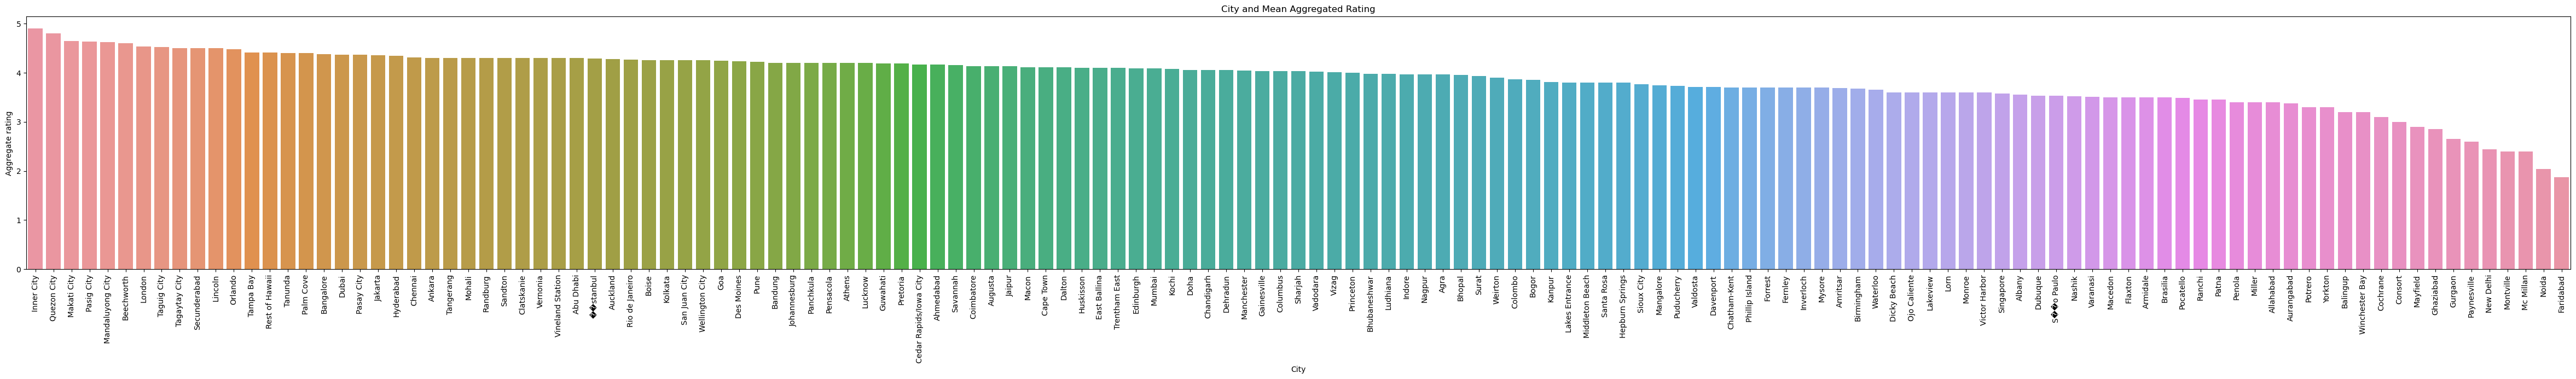

In [37]:
# Plotting city vs aggregated rating in descending order

plt.figure(figsize = (60,6))
sns.barplot(x= 'City', y= "Aggregate rating", data= City_rating)
plt.title('City and Aggregate Rating', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 10)
plt.title ("City and Mean Aggregated Rating")
plt.show()

# INSIGHTS

# 1.Inner city and some cities in Philipines top the list of highest ratings
# 2. London ranks top 7
# 3. Seconderabad is the only Indian city in top 10
# 4. Multiple Indian cities rank in top 255. 
# 5. New Delhi ranks 136 and is in the last 5 cities
# 6. Two other indian cities rank in last two - Noida and Faridabad with mean rating of 1.8 and 2


# Identify the top cuisines and cities with the highest number of restaurants.

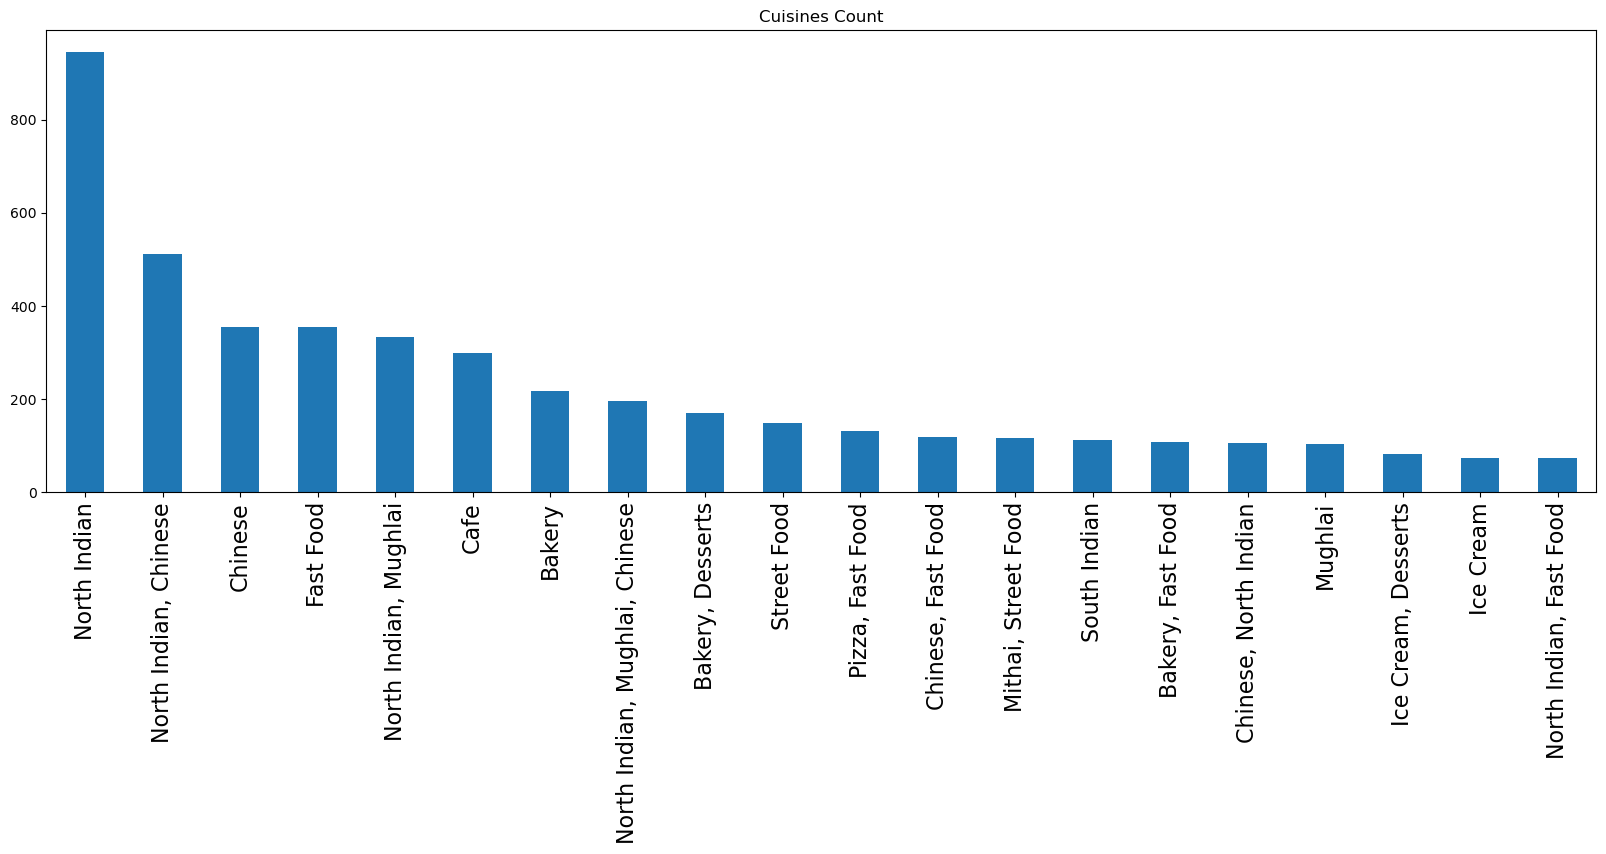

In [38]:
# TOP 20 Cuisines

plt.figure(figsize = (20,6))
df['Cuisines'].value_counts().head(20).plot(kind = 'bar')
plt.title('Cuisines', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 16)
plt.title ('Cuisines Count')
plt.show()


# INSIGHTS

# 1. North Indian ranks first
# 2. CHINESE, Fast Food, Cafe and Bakery ranks in top 6 
# 3. Street Food ranks 10 
# 4. Pizza ranks 11


# Top Cuisine is North Indian Food

In [39]:
# City with the most restaurants

df['City'].value_counts().sort_values(ascending = False)

# New Delhi ranks first with 5473 restaurants

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Armidale               1
Tagaytay City          1
Randburg               1
Quezon City            1
Vineland Station       1
Name: City, Length: 141, dtype: int64

# LEVEL 1 : TASK 3: GEOSPATIAL ANALYSIS

# Visualize the locations of restaurants on a map using latitude and longitude information.

In [40]:
# IMPORTING LIBRARIES FOR VISUALISATION OF RESTAURANTS ON MAP

# EXPLANATION OF GEOMETRY AND POINT

# A geometry type that represents a single coordinate with x,y and possibly z values.

# A point is a zero-dimensional feature and has zero length and zero area.

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


In [41]:
# CREATING A NEW DATAFRAME WITH LATITUDE AND LONGITUDE 


df2 = df.iloc[:,7:9]



geometry = [Point(xy) for xy in zip(df2['Longitude'], df2['Latitude'])]
gdf = GeoDataFrame(df2, geometry=geometry)   

gdf

Longitude   Latitude                    geometry
0     121.027535  14.565443  POINT (121.02754 14.56544)
1     121.014101  14.553708  POINT (121.01410 14.55371)
2     121.056831  14.581404  POINT (121.05683 14.58140)
3     121.056475  14.585318  POINT (121.05648 14.58532)
4     121.057508  14.584450  POINT (121.05751 14.58445)
...          ...        ...                         ...
9546   28.977392  41.022793   POINT (28.97739 41.02279)
9547   29.041297  41.009847   POINT (29.04130 41.00985)
9548   29.034640  41.055817   POINT (29.03464 41.05582)
9549   29.036019  41.057979   POINT (29.03602 41.05798)
9550   29.026016  40.984776   POINT (29.02602 40.98478)

[9551 rows x 3 columns]

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_90373/397159180.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


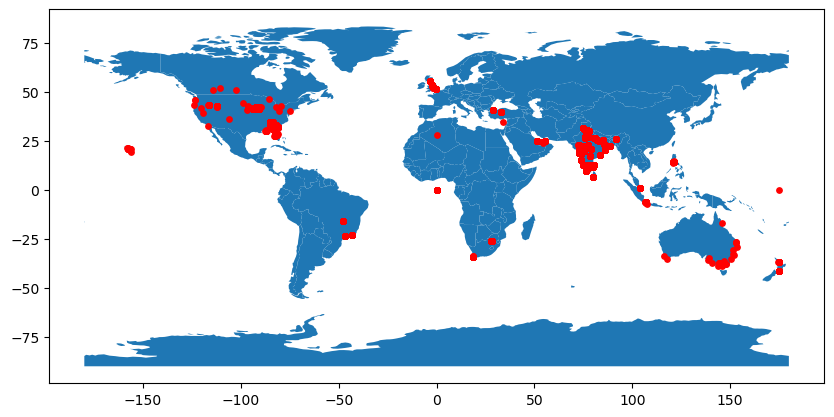

In [42]:
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [43]:
# # INSIGHTS

# 1. Most the restaurants are in India, USA and Australia
# 2. Very few are from Europe, Africa and Newzealand
# 3. Very few in the middle east and rest of asia as well
# 4. The top country having the restaurant is India


# Analyze the distribution of restaurants across different cities or countries.

In [44]:
df_RestByCity= df.groupby('City').size().sort_values(ascending = False).reset_index().rename(columns={0:'Num_Restaurants'})

In [45]:
df_RestByCity

City  Num_Restaurants
0      New Delhi             5473
1        Gurgaon             1118
2          Noida             1080
3      Faridabad              251
4      Ghaziabad               25
..           ...              ...
136  Dicky Beach                1
137         Lorn                1
138  Quezon City                1
139      Lincoln                1
140     Lakeview                1

[141 rows x 2 columns]

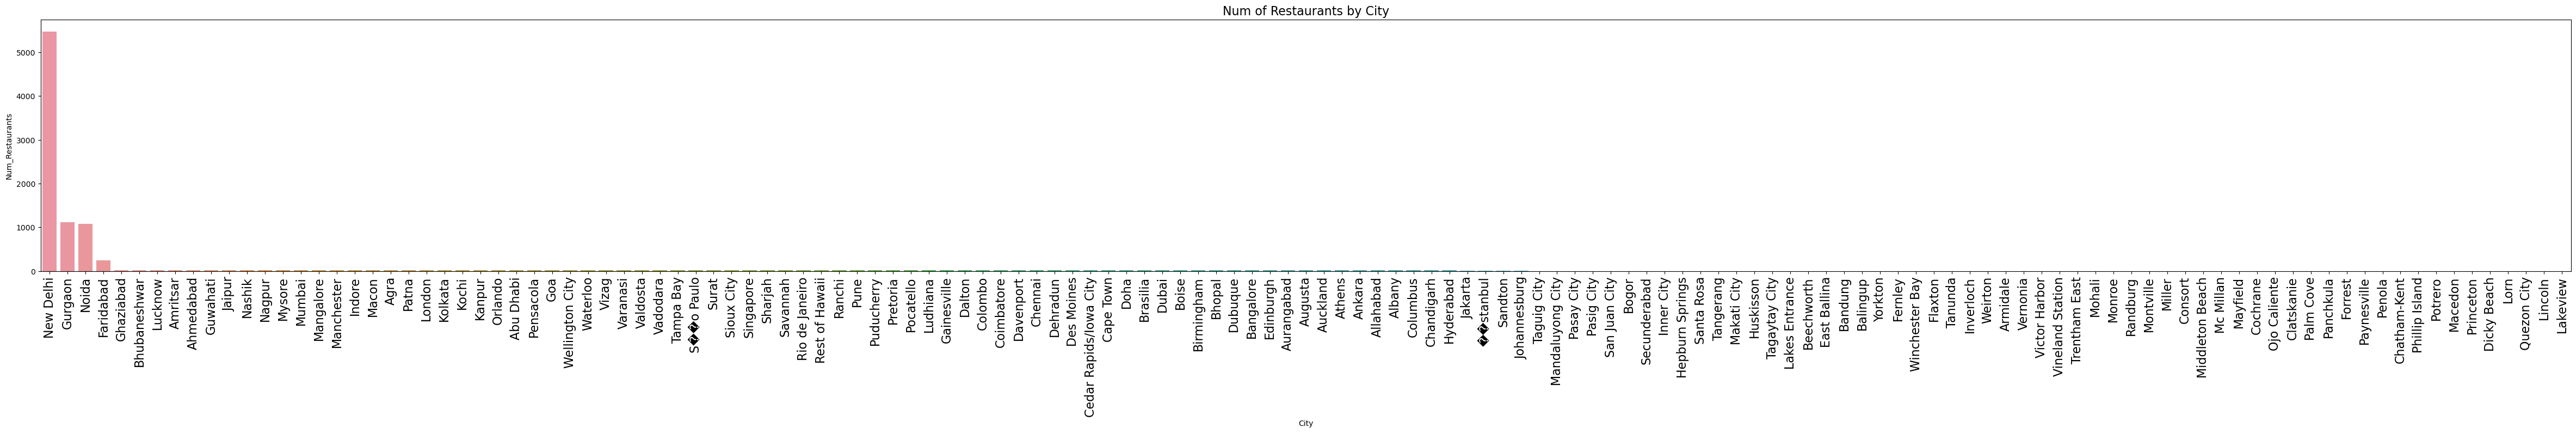

In [46]:
plt.figure(figsize = (60,6))
sns.barplot(x = 'City',y = 'Num_Restaurants', data = df_RestByCity)
plt.title('Num of Restaurants by City', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 16)
plt.show()


In [47]:
# # INSIGHTS

# 1. New Delhi has the highest restaurants followed by Gurgaon, Noida and Faridabad
# 2. There are 141 Cities and only 4 cities have restaurants over 100
# 3. All other cities have less than 100 restaurants
# 4. Most of the cities in top 20 are from country India
# 5. Macon and Manchester are the only two cities outside of India in Top 20

# Determine if there is any correlation between the restaurant's location and its rating.

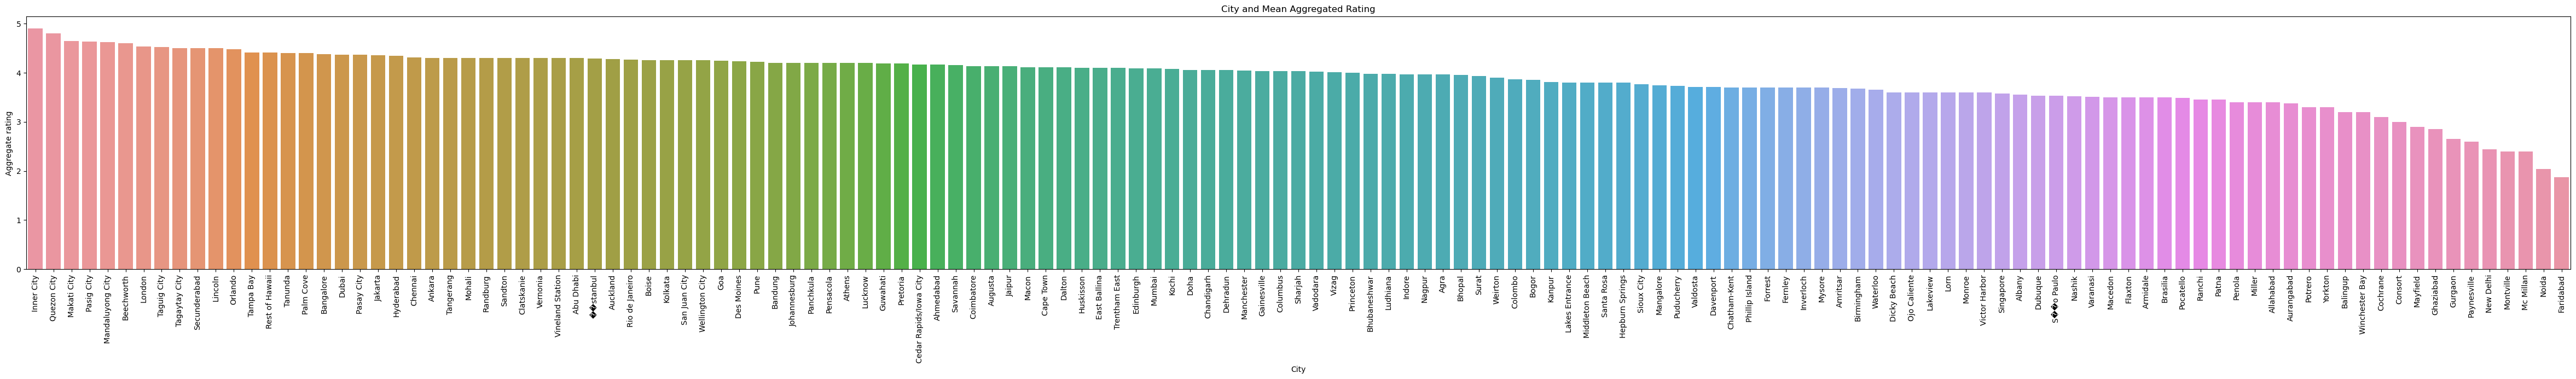

In [48]:
# Plotting city vs aggregated rating in descending order

plt.figure(figsize = (60,6))
sns.barplot(x= 'City', y= "Aggregate rating", data= City_rating)
plt.title('City and Aggregate Rating', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 10)
plt.title ("City and Mean Aggregated Rating")
plt.show()

# INSIGHTS

# 1.Inner city and some cities in Philipines top the list of highest ratings
# 2. London ranks top 7 in the rating and is in top 25 of the number of restaurants
# 3. Seconderabad is the only Indian city in top 10
# 4. Multiple Indian cities rank in top 255. 
# 5. New Delhi ranks 136 and is in the last 5 cities
# 6. Two other indian cities rank in last two - Noida and Faridabad with mean rating of 1.8 and 2
# 7. Though Newdelhi has the most restaurants over 5000, the rating is in the last 5

In [49]:
# GROUPING CITY AND MEAN RATING

In [50]:
City_Rating_mean = df.groupby(['City']).agg({'City':'count', 'Aggregate rating':'mean'}).rename(columns = {'City': 'NumRest'}).sort_values(by = 'NumRest', ascending = False).reset_index()

In [51]:
City_Rating_mean 

City  NumRest  Aggregate rating
0      New Delhi     5473          2.438845
1        Gurgaon     1118          2.651431
2          Noida     1080          2.036204
3      Faridabad      251          1.866932
4      Ghaziabad       25          2.852000
..           ...      ...               ...
136  Dicky Beach        1          3.600000
137         Lorn        1          3.600000
138  Quezon City        1          4.800000
139      Lincoln        1          4.500000
140     Lakeview        1          3.600000

[141 rows x 3 columns]

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_90373/69567084.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(City_Rating_mean.corr(), annot = True)


<Axes: >

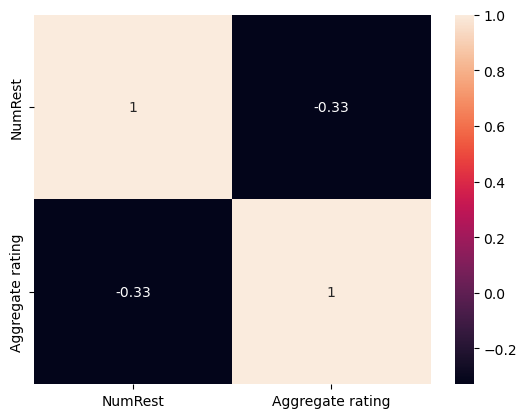

In [52]:
sns.heatmap(City_Rating_mean.corr(), annot = True)

In [54]:
# INSIGHTS

1. Location having highest number of restaurants have lower rating than ones with lesser restaurants
2. Correlation and number or restaurants have a negative correlation of -0.33

SyntaxError: invalid syntax (2594020685.py, line 3)

In [ ]:
# Plotting Mean aggregated rating per number or restaurants in each city

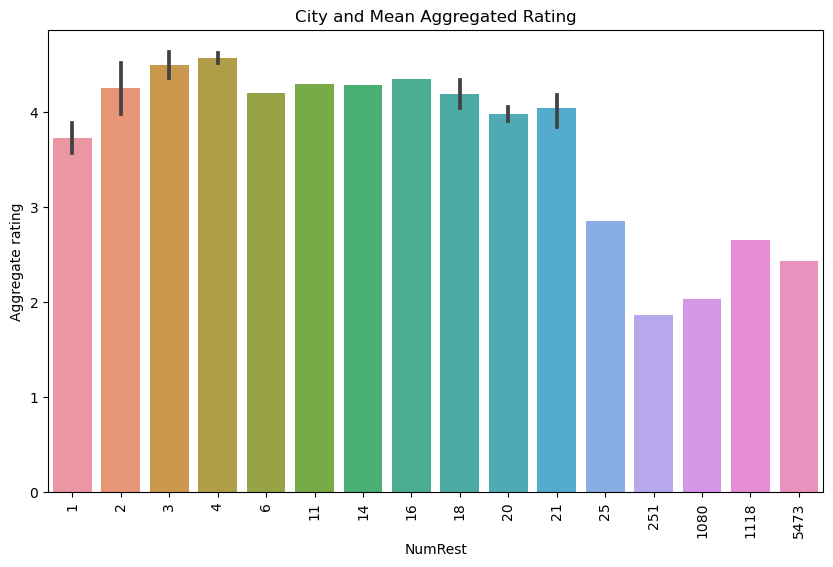

In [55]:
plt.figure(figsize = (10,6))
sns.barplot(x= 'NumRest', y= "Aggregate rating", data= City_Rating_mean)
plt.title('City and Aggregate Rating', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 10)
plt.title ("City and Mean Aggregated Rating")
plt.show()

In [56]:
# INSIGHTS

# Lower the number of restaurants higher the rating proving the strong negative correlation as shown in the heatmap
# All the cities with restaurants over 100 have rating less than 3
# All the cities with restaurants less than 25 have rating over 3
# The lower rating need not speicifically indicate bad food or experience as the number of restaurants are vastly different

# PLOTTING A DOUBLE Y AXES PLOT FOR SHOWING CITY, RATING AND NUMBER OF RESTAURANTS

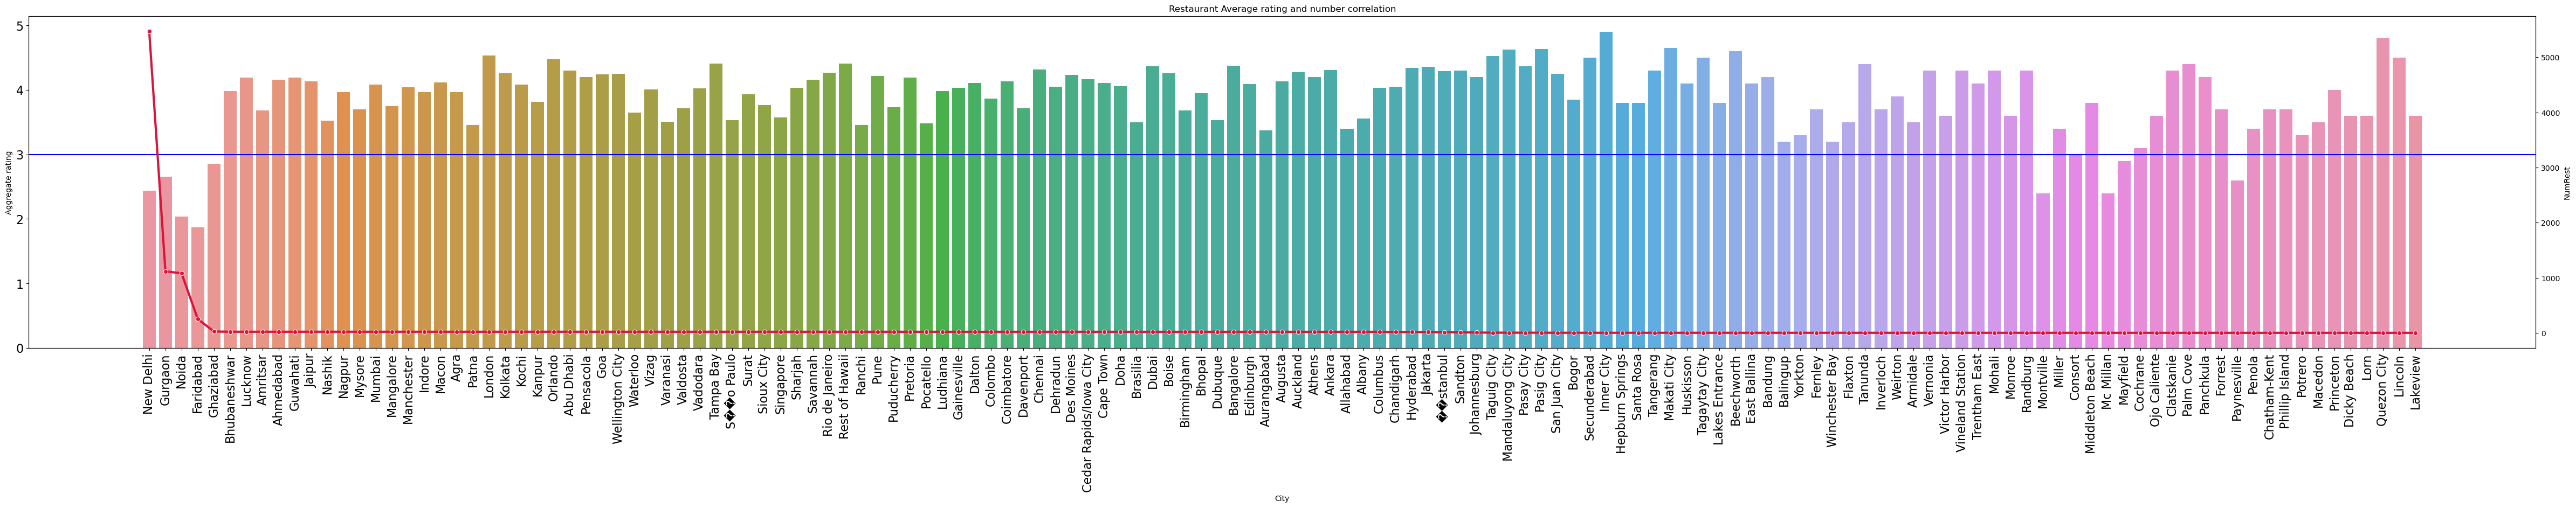

In [57]:
plt.figure(figsize=(60,8))
ax = sns.barplot(x='City', y='Aggregate rating', data=City_Rating_mean)
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
ax.axhline(3, color="blue")
ax2 = ax.twinx()
sns.lineplot(x='City', y='NumRest', data=City_Rating_mean, marker='o', color='crimson', lw=3, ax=ax2)
plt.title('Restaurant Average rating and number correlation')
plt.show()


# All the TOP 5 CITIES have less than 3 rating
# Amongst the rest 136 cities only  4 cities have less than 3 ratings 


# LEVEL 2 :  TASK 1 - TABLE BOOKING AND ONLINE DELIVERY

# Determine the percentage of restaurants that offer table booking and online delivery

# HAVE TABLE BOOKING

In [58]:
#City wise analysis How many city has table booking feature

Table_booking = df.groupby('City')[('Has Table booking')].value_counts().sort_values(ascending=False)


In [59]:
Table_booking = Table_booking.unstack().fillna(0).astype(int) 

# Moving the Yes and No grouped columns into individual columns

In [60]:
Table_booking =Table_booking.sort_values(by = ['Yes', 'No'], ascending = False).reset_index()

# Resetting index

In [61]:
# Adding a new feature Percent of restaurants having  Table booking facility

Table_booking['Percent'] = Table_booking['Yes']/(Table_booking['Yes']+Table_booking['No'])*100

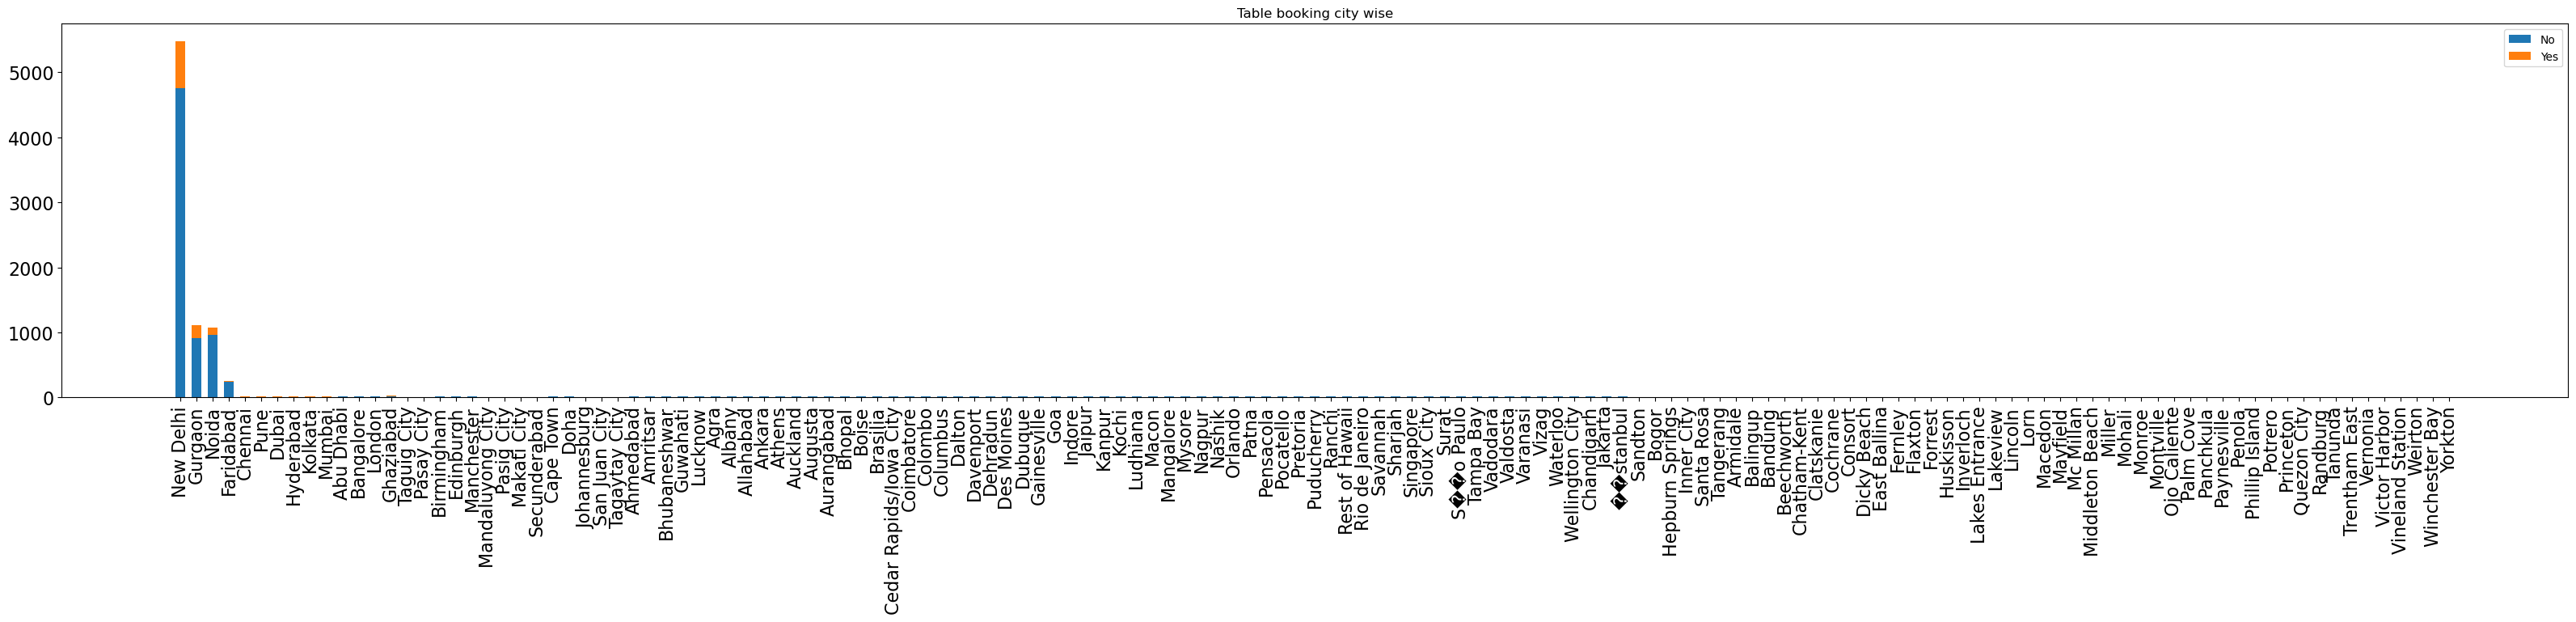

In [62]:
# PLOTTING ON STACKED BAR CHARTS FOR ALL CITIES

fig, ax = plt.subplots(figsize = (40,6))
ax.bar(Table_booking['City'], Table_booking["No"], label = "No", width = 0.6) 
ax.bar(Table_booking['City'], Table_booking["Yes"], bottom = Table_booking.No, label = "Yes", width = 0.6) 
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Table booking city wise')
plt.legend()
plt.show()

In [69]:
# SPLICING FOR TOP 5 CITIES

Table_booking2= Table_booking[0:5]
Table_booking2

Has Table booking       City    No  Yes    Percent
0                  New Delhi  4758  715  13.064133
1                    Gurgaon   914  204  18.246869
2                      Noida   968  112  10.370370
3                  Faridabad   236   15   5.976096
4                    Chennai     7   13  65.000000

In [70]:
# HAS TABLE BOOKING FOR TOP 5 CITIES 

# # Plotting a separate stacked plot for table booking in Top 5 cities as the number of restaurants are huge in the first 4
# 1. The percent of table booking facilities available in the top 4 city's restaurants with over 8000 restaurants  are
# in an average is about 5-19 % 
# 2. Chennai ranks 5 and has 65% restaurants with table booking facility

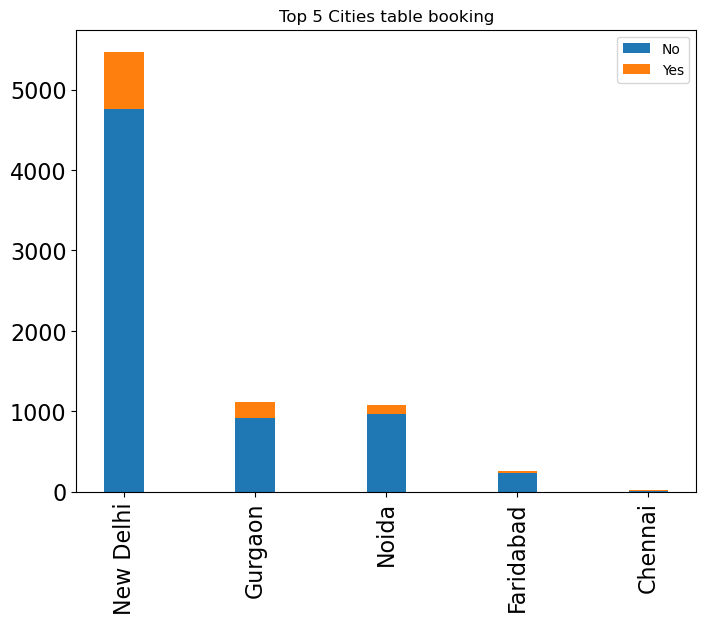

In [71]:
# PLOTTING ON STACKED BAR CHARTS FOR top 5 CITIES

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(Table_booking2['City'], Table_booking2["No"], label = "No", width = 0.3) 
ax.bar(Table_booking2['City'], Table_booking2["Yes"], bottom = Table_booking2.No, label = "Yes", width = 0.3) 
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Top 5 Cities table booking')
plt.legend()
plt.show()

In [72]:
Table_booking3= Table_booking[6:]
Table_booking3


Has Table booking              City  No  Yes    Percent
6                             Dubai   8   12  60.000000
7                         Hyderabad   8   10  55.555556
8                           Kolkata  11    9  45.000000
9                            Mumbai  11    9  45.000000
10                        Abu Dhabi  14    6  30.000000
..                              ...  ..  ...        ...
136                   Victor Harbor   1    0   0.000000
137                Vineland Station   1    0   0.000000
138                         Weirton   1    0   0.000000
139                  Winchester Bay   1    0   0.000000
140                         Yorkton   1    0   0.000000

[135 rows x 4 columns]

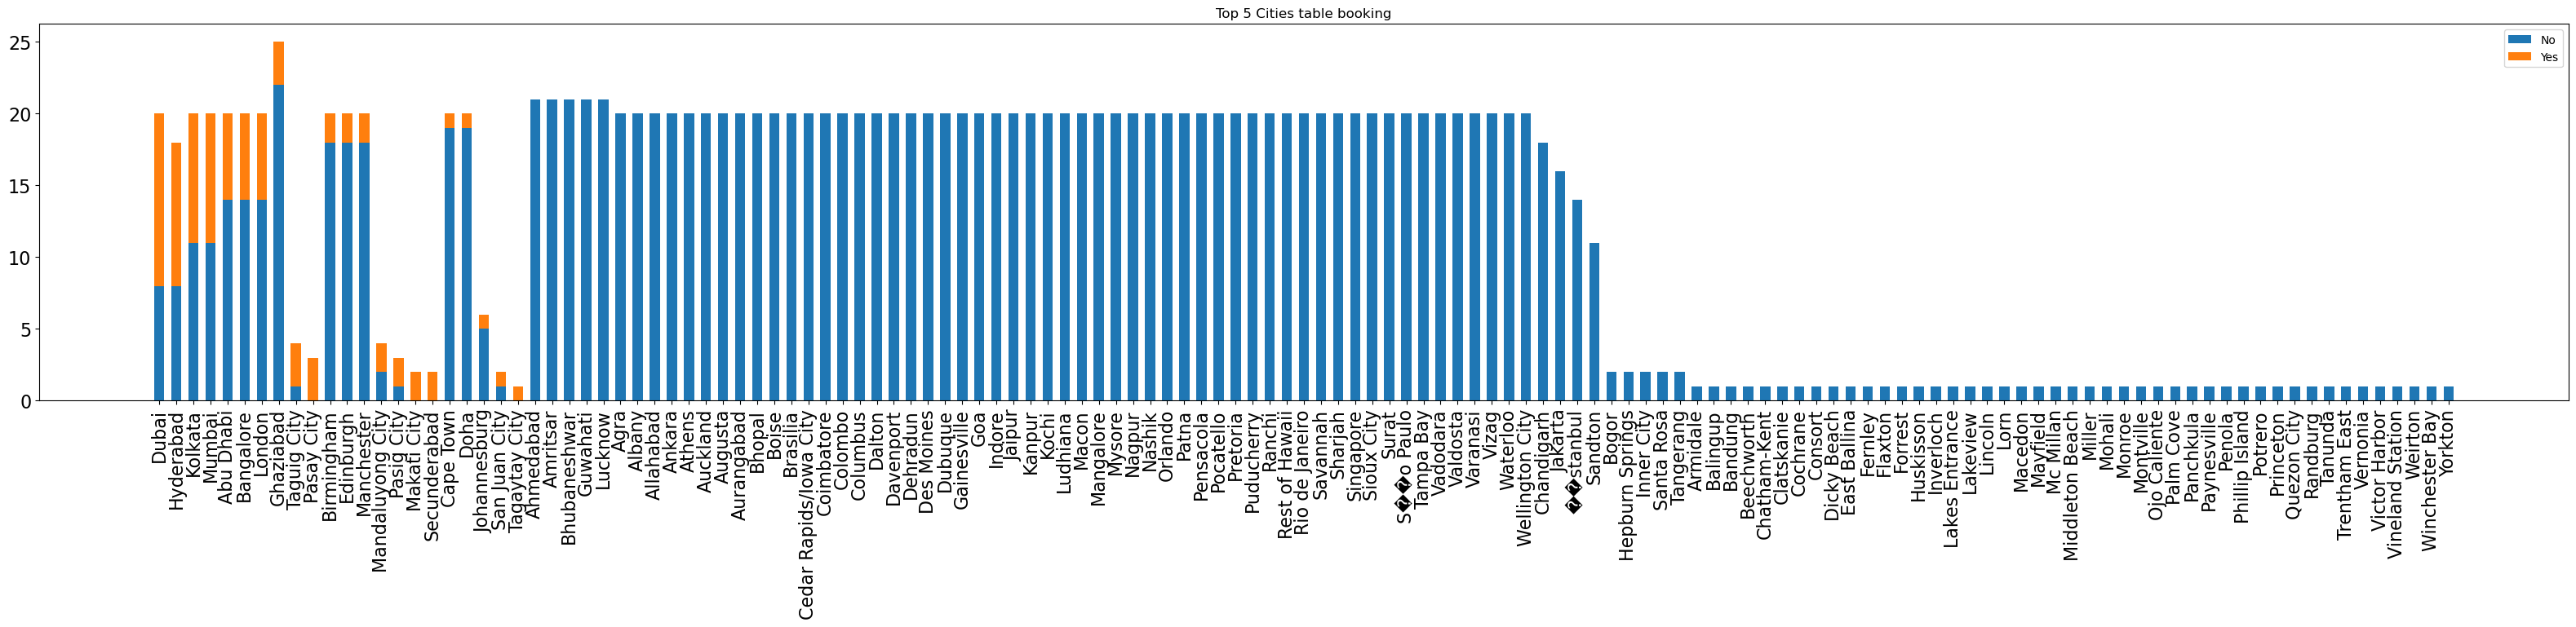

In [73]:
# PLOTTING ON STACKED BAR CHARTS FOR REST OF THE CITIES

fig, ax = plt.subplots(figsize = (40,6))
ax.bar(Table_booking3['City'], Table_booking3["No"], label = "No", width = 0.6) 
ax.bar(Table_booking3['City'], Table_booking3["Yes"], bottom = Table_booking3.No, label = "Yes", width = 0.6) 
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Top 5 Cities table booking')
plt.legend()
plt.show()

In [ ]:
# INSIGHTS:
    
# 1. Top 25 restarurants by number have table booking facility
# 2. None of the rest 116 restaurants have table booking facility

In [74]:
Table_booking4= Table_booking[:27]

Table_booking4= Table_booking4.sort_values(by = 'Percent',ascending = False)

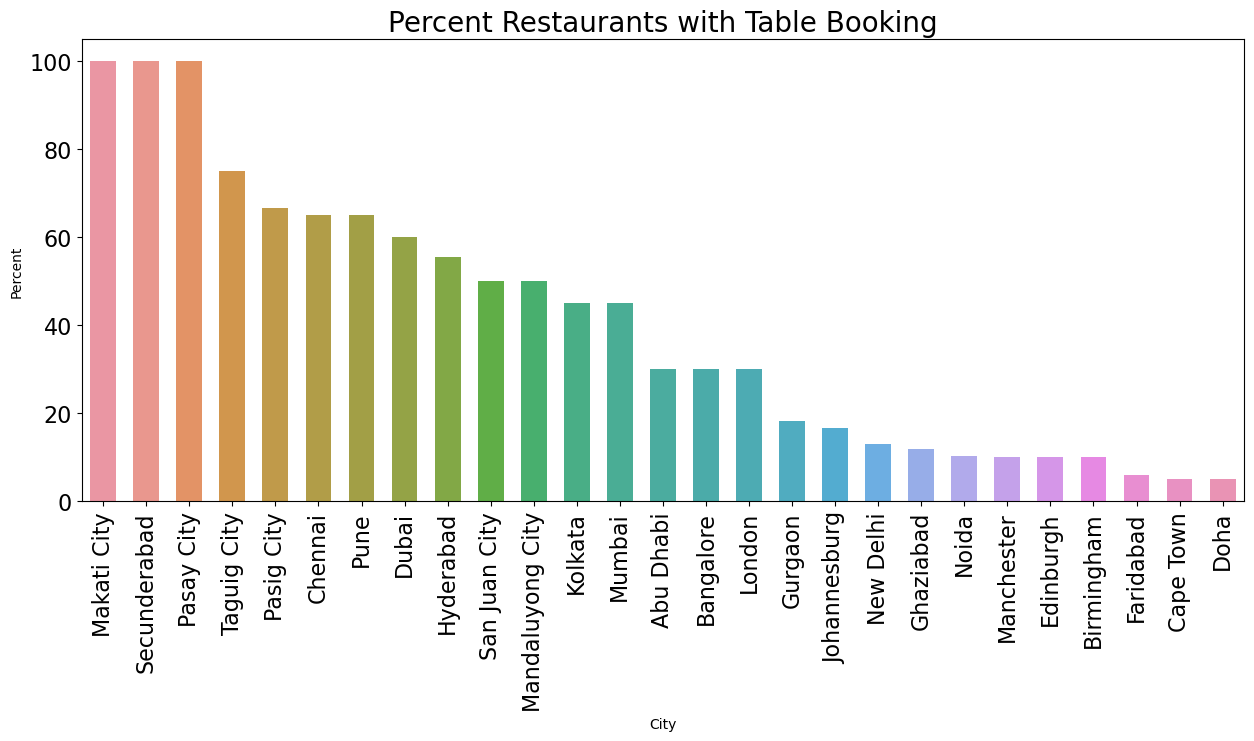

In [75]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'City' , y = 'Percent', data = Table_booking4,width = 0.6)
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Percent Restaurants with Table Booking', fontsize = 20)
plt.show()

In [76]:
# INSIGHTS

# # Plotted 26 restaurants with table booking facility

# 1. Makati, Secunderabad and Pasay city have 100% Table booking facility
# 2. Taguig, Pasig, Chennai, Pune, Dubai and Hyderbad have over 50% TABLE BOOKING facility
# 3. Rest of the cities have 50% or less percentage of restaurants with table booking facility


In [77]:
# COMPARING THE AGGREGATE RATING & HAS TABLE BOOKING FACILITY

In [78]:
Table_booking5 = df.groupby('Has Table booking')[('Aggregate rating')].mean()

In [79]:
Table_booking5 = pd.DataFrame(Table_booking5).reset_index()

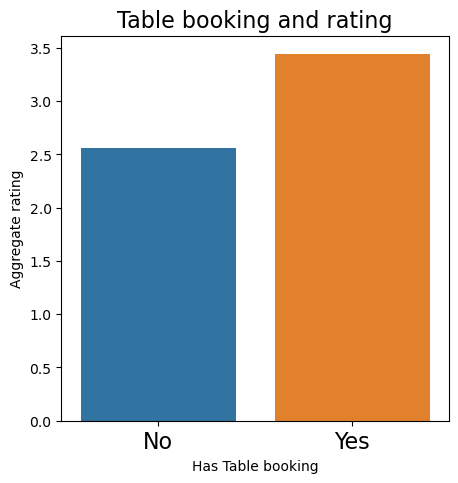

In [80]:
plt.figure(figsize = (5,5))
sns.barplot(x= 'Has Table booking', y= "Aggregate rating", data= Table_booking5)
plt.title('Table booking and rating', fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()


# INSIGHTS

# On an average the restaurants with table booking have a higher rating than without

# HAS ONLINE DELIVERY

In [81]:
Online_del = df.groupby('City')['Has Online delivery'].value_counts().sort_values(ascending=False)
Online_del

City          Has Online delivery
New Delhi     No                     3984
              Yes                    1489
Noida         No                      716
Gurgaon       No                      693
              Yes                     425
                                     ... 
Lincoln       No                        1
Lakeview      No                        1
East Ballina  No                        1
Chatham-Kent  No                        1
Penola        No                        1
Name: Has Online delivery, Length: 162, dtype: int64

In [82]:
Online_del = Online_del.unstack().fillna(0).astype(int).reset_index()


In [83]:
Online_del= Online_del.sort_values(by = 'Yes', ascending = False)

In [84]:
# Adding a new feature Percent of restaurants having  Table booking facility

Online_del['Percent'] = Online_del['Yes']/(Online_del['Yes']+Online_del['No'])*100

Online_del

Has Online delivery          City    No   Yes    Percent
88                      New Delhi  3984  1489  27.206285
50                        Gurgaon   693   425  38.014311
89                          Noida   716   364  33.703704
43                      Faridabad   216    35  13.944223
26                        Chennai     7    13  65.000000
..                            ...   ...   ...        ...
44                        Fernley     1     0   0.000000
42                      Edinburgh    20     0   0.000000
41                   East Ballina     1     0   0.000000
40                        Dubuque    20     0   0.000000
140                     ��stanbul    14     0   0.000000

[141 rows x 4 columns]

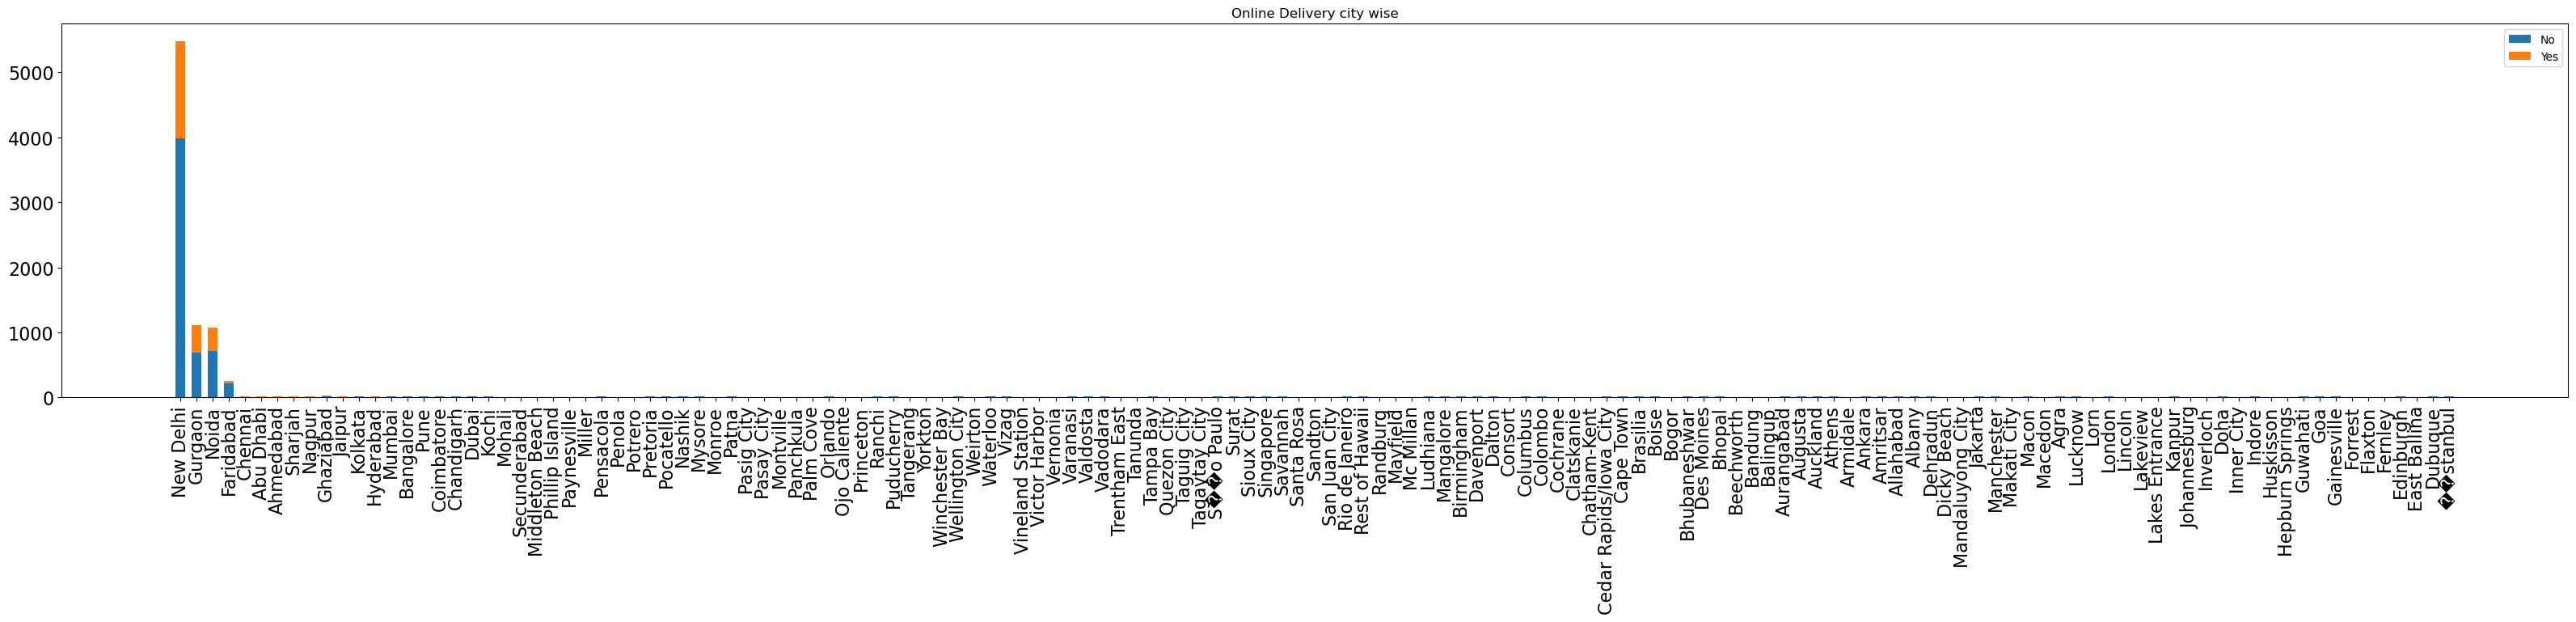

In [85]:
# PLOTTING ON STACKED BAR CHARTS FOR ALL CITIES

fig, ax = plt.subplots(figsize = (40,6))
ax.bar(Online_del['City'], Online_del["No"], label = "No", width = 0.6) 
ax.bar(Online_del['City'], Online_del["Yes"], bottom = Online_del.No, label = "Yes", width = 0.6) 
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Online Delivery city wise')
plt.legend()
plt.show()

In [ ]:
# PLOTTING ON STACKED BAR CHARTS FOR Top 25 cities WITH ONLINE DELIVERY

Online_del2 = Online_del[:26]
fig, ax = plt.subplots(figsize = (17,6))
ax.bar(Online_del2['City'], Online_del2["No"], label = "No", width = 0.6) 
ax.bar(Online_del2['City'], Online_del2["Yes"], bottom = Online_del2.No, label = "Yes", width = 0.6) 
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Online Delivery city wise', fontsize = 16)
plt.legend()
plt.show()

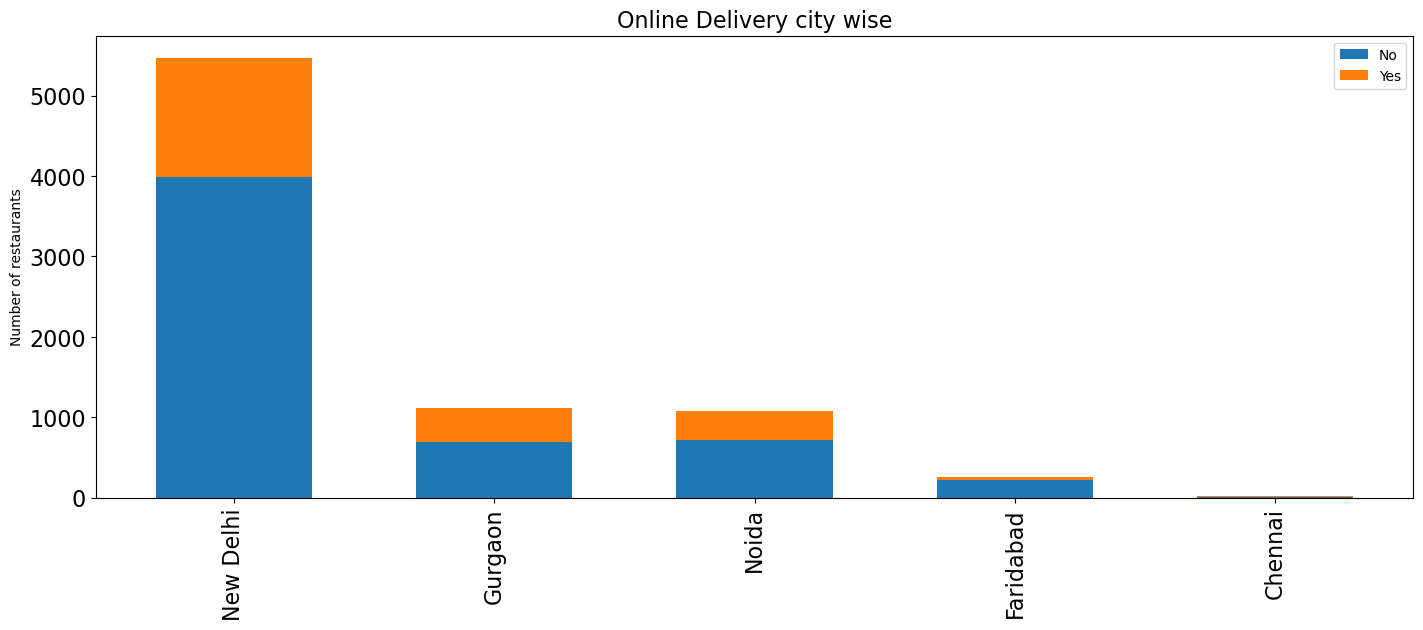

In [86]:
# PLOTTING ON STACKED BAR CHARTS FOR Top 5 cities WITH ONLINE DELIVERY

Online_del3 = Online_del[:5]
fig, ax = plt.subplots(figsize = (17,6))
ax.bar(Online_del3['City'], Online_del3["No"], label = "No", width = 0.6) 
ax.bar(Online_del3['City'], Online_del3["Yes"], bottom = Online_del3.No, label = "Yes", width = 0.6) 
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Number of restaurants')
plt.title('Online Delivery city wise', fontsize = 16)
plt.legend()
plt.show()

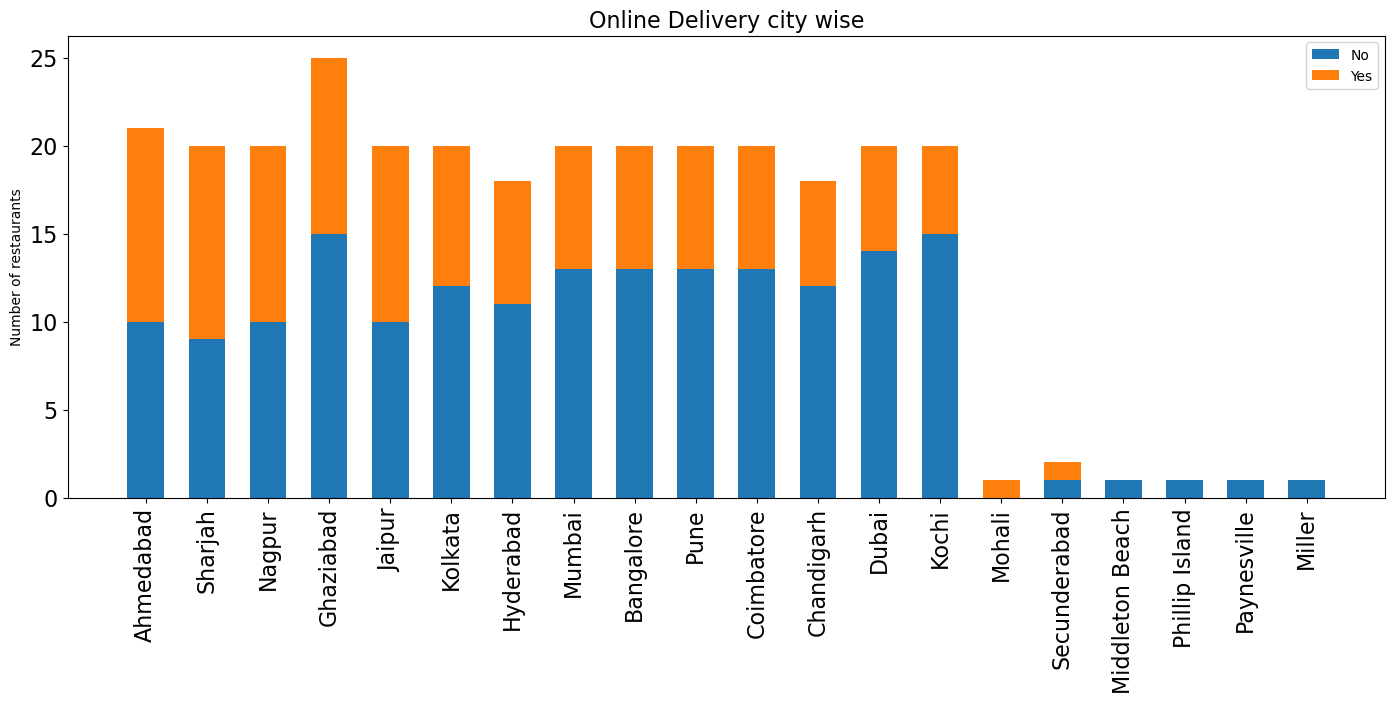

In [87]:
# PLOTTING ON STACKED BAR CHARTS FOR top 6- 20 cities WITH ONLINE DELIVERY

Online_del4 = Online_del[6:26]
fig, ax = plt.subplots(figsize = (17,6))
ax.bar(Online_del4['City'], Online_del4["No"], label = "No", width = 0.6) 
ax.bar(Online_del4['City'], Online_del4["Yes"], bottom = Online_del4.No, label = "Yes", width = 0.6) 
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Number of restaurants')
plt.title('Online Delivery city wise', fontsize = 16)
plt.legend()
plt.show()

In [88]:
Online_del5 = Online_del[:26]

In [89]:
Online_del5 = Online_del5.sort_values(by = 'Percent',ascending = False)

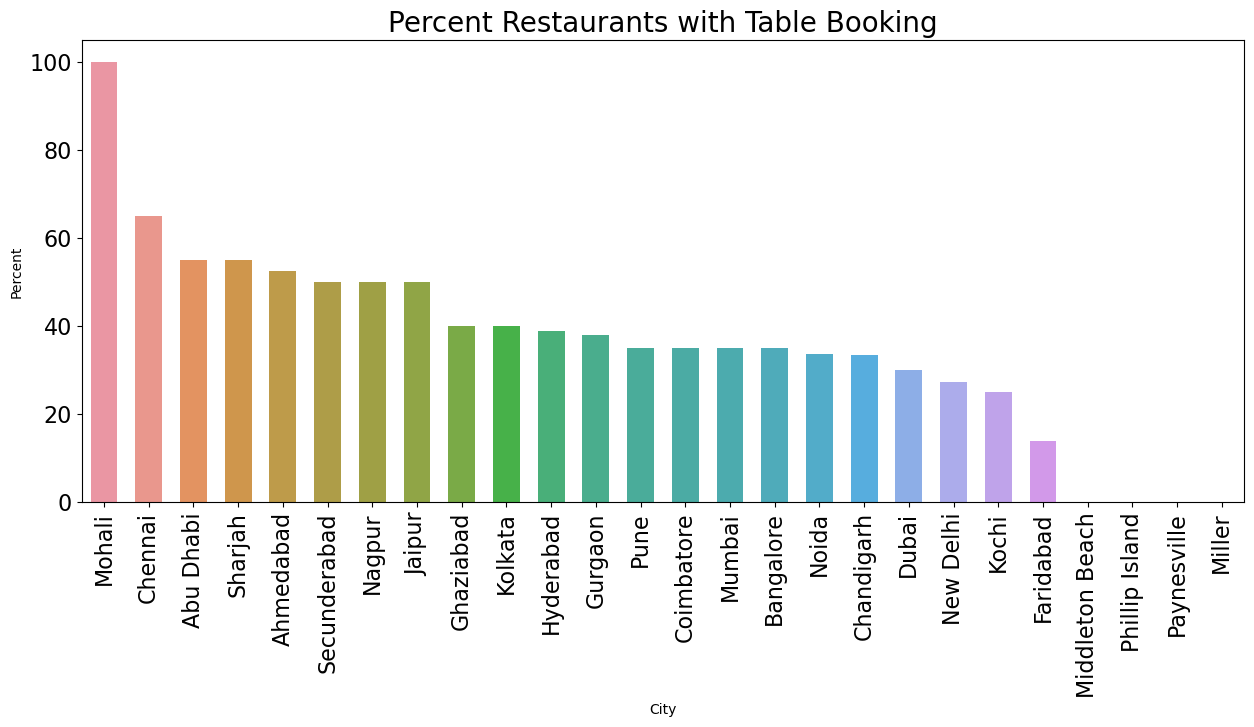

In [90]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'City' , y = 'Percent', data = Online_del5,width = 0.6)
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Percent Restaurants with Table Booking', fontsize = 20)
plt.show()

In [91]:
# COMPARING THE AGGREGATE RATING & HAS ONLINE BOOKING FACILITY

In [92]:
Online_del6 = df.groupby('Has Online delivery')[('Aggregate rating')].mean()

In [93]:
Online_del6  = pd.DataFrame(Table_booking5).reset_index()
Online_del6

index Has Table booking  Aggregate rating
0      0                No          2.559359
1      1               Yes          3.441969

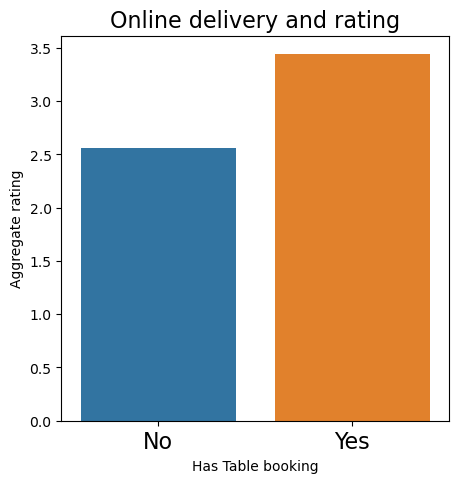

In [94]:
plt.figure(figsize = (5,5))
sns.barplot(x= 'Has Table booking', y= "Aggregate rating", data= Online_del6 )
plt.title('Online delivery and rating', fontsize = 16)
plt.xticks(fontsize = 16)
plt.show()

In [95]:
Online_Del8 = pd.DataFrame(df['Has Online delivery'].value_counts())
Online_Del8=Online_Del8.reset_index()

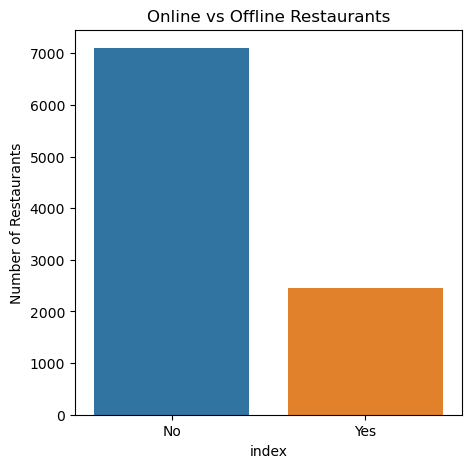

In [96]:
plt.figure(figsize =(5,5))
sns.barplot(x = 'index', y ='Has Online delivery', data = Online_Del8);
plt.title('Online vs Offline Restaurants');
plt.ylabel('Number of Restaurants')
plt.show()

In [97]:
# # INSIGHTS


# 1. Only 21 Cities out of 141 Cities have online delivery facility
# 2. Top 15 Cities have 20-30% restuarants offering Online delivery 
# 3. Mohali city has 100% online delivery facility 
# 4. Chennai ranks second with 65% online delivery facility
# 5. Abudhabi and sharjah have over 50% online delivery facility
# 6. Top 8 Cities have over 50% online delivery and rest of them have less than 50% 
# 7. New Delhi has over 5000 restaurants and still has ony 27% online delivery faciity
# 8. The restaurants have online delivery have a highre rating
# 9 Very few restaruants have online delivery, only 2500 restaurants have online delivery amogst 9500 restaurants

# Analyze the availability of online delivery among restaurants with different price ranges.

In [98]:
Price_range = df.groupby('Has Online delivery')['Price range'].value_counts()

In [99]:
Price_range = pd.DataFrame(Price_range.unstack().fillna(0).astype(int).reset_index())


In [100]:
Price_range

Price range Has Online delivery     1     2    3    4
0                            No  3743  1827  997  533
1                           Yes   701  1286  411   53

<Figure size 800x600 with 0 Axes>

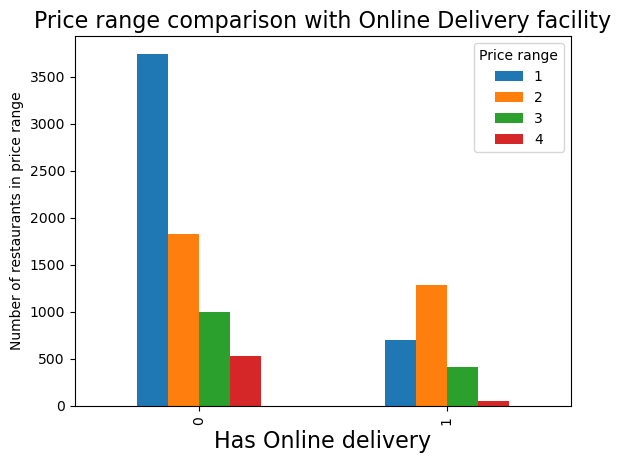

In [101]:
plt.figure(figsize = (8,6))
Price_range.plot(kind = 'bar')
plt.xlabel('Has Online delivery', fontsize = 16)
plt.ylabel('Number of restaurants in price range')
plt.title('Price range comparison with Online Delivery facility', fontsize = 16)
plt.show()

In [102]:
# # INSIGHTS

# 1. Majority of restaurants in price range 1 do not have online delivery facility
# 2. Price range 2 has more number of restaurants with online delivery facility 
# 3. Price range 4 restaurants have about only 100 with online delivery facility

# LEVEL 2 - TASK 2:  Price Range Analysis

# Determine the most common price range among all the restaurants.

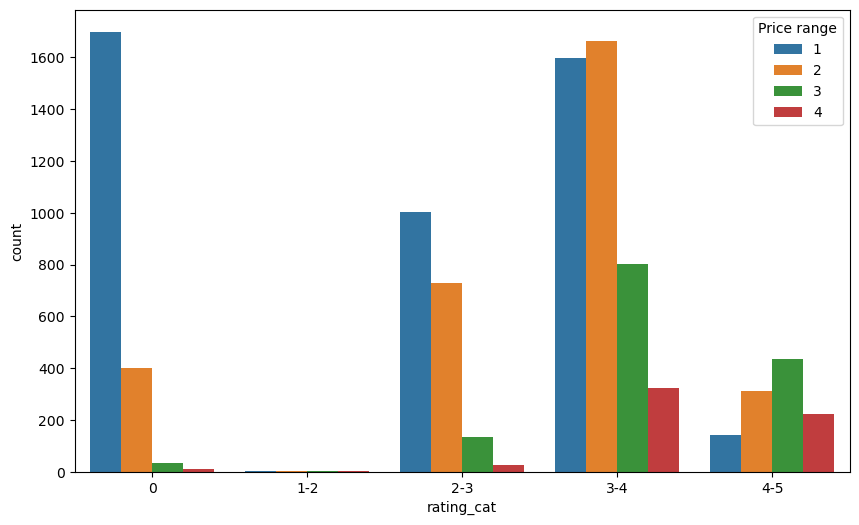

In [103]:
# Visualisting the Price range amongst rating categories

order_list = ['0', '1-2', '2-3', '3-4', '4-5']

plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'rating_cat', hue = 'Price range', order = order_list)
plt.show()

In [104]:
# # INSIGHTS

# 1. The highest number of restaurants for price range 1,2 have a good rating of 3-4 
# 2. The highest rated restaurants have price range 3 with the most restaurants
# 3. The most common price range amonfst all restaurants are 1 and 2
# 4. Number of highest rated restaurants are lower in the less ratings range 
# while they are much higher in the higher rating ranges
# 5. The price ranges 1,2 are higher in the rating category of 0-4 and lower in the 4-5 category

# Calculate the average rating for each price range.

In [105]:
Avg_rating = pd.DataFrame(df.groupby('Price range')['Aggregate rating'].mean().reset_index())

In [106]:
Avg_rating

Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918

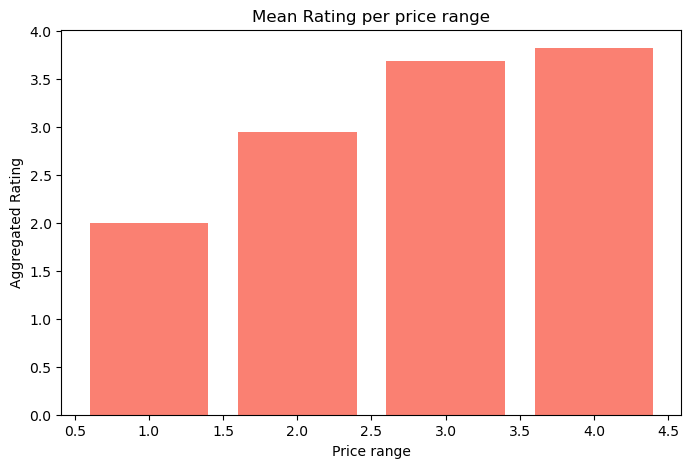

In [107]:
plt.figure(figsize = (8,5))
plt.bar(x = 'Price range',  height = 'Aggregate rating', data = Avg_rating, color = 'Salmon')
plt.xlabel('Price range')
plt.ylabel('Aggregated Rating')
plt.title('Mean Rating per price range')
plt.show()

In [108]:
# INSIGHTS

# 1 Mean rating for price range 1 = 1.99
# 2 Mean rating for price range 1 = 2.94
# 3 Mean rating for price range 1 = 3.68
# 4 Mean rating for price range 1 = 3.81


# Identify the color that represents the highest average rating among different price ranges.

In [109]:
# Checking the various rating colors

df['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [110]:
# Creating a dataframe with rating and color features

Rat_col = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
Rat_col

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

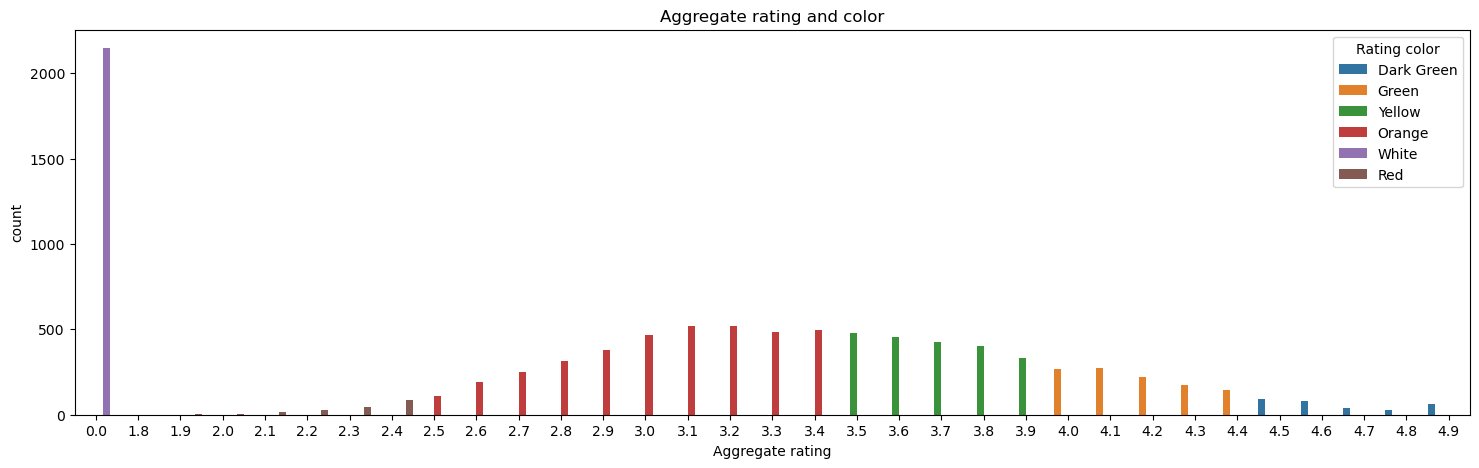

In [111]:
# Plotting rating vs color


plt.figure(figsize = (18,5))
sns.countplot(x = 'Aggregate rating', data = df, hue = 'Rating color', width =1)
plt.title('Aggregate rating and color')
plt.show()


In [ ]:
# Plotting aggreated rating and vs color 

sns.barplot(x= 'Aggregate rating', y='Rating color', data= Rat_col, palette=['violet', 'yellow', 'green', 'orange','blue','black']);

<Axes: xlabel='Rating color', ylabel='count'>

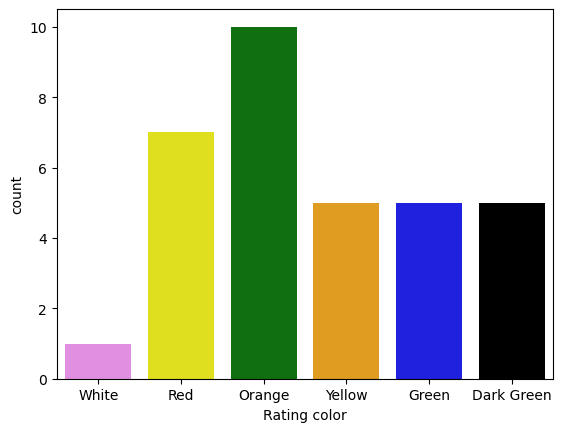

In [112]:
sns.countplot(x='Rating color', data= Rat_col, palette= ['violet', 'yellow', 'green', 'orange','blue','black'])



In [113]:
# # INSIGHTS

# 1. 0 rating has the most count
# 2. Most of the ratings are between 2.5-4.4 
# 3. Orange is the color with highest average rating amongst all ratings 


# LEVEL 2 : TASK 3 - Feature Engineering

In [114]:
# Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [115]:
# I have extracted further features like rating_cat and votes_count for visualisation purpose as seen here in the data frame
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes rating_cat votes_count  
0   Excellent    314        4-5    300-1000  
1   Excellent    591        4-5    300-1000  
2   Very Good    270        4-5       0-300  
3   Excellent    365        4-5    300-1000  
4   Excellent    229        4-5       0-300

In [116]:
# Creating new restaurant name length in a new data frame

In [117]:
df3 = df.copy()
df3

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776      

In [118]:
# Created new features with lengths of certain categorical columns

df3['Rest_name-lenght'] = len(df3['Restaurant Name'])
df3['Address_length'] = len(df3['Address'])
df3['Locality_length'] = len(df3['Locality'])
                            

In [119]:
df3.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes rating_cat votes_count  Rest_name-lenght  Address_length  \
0   Excellent    314        4-5    300-1000              9551            9551   
1   Excellent    591        4-5    300-1000              9551            9551   
2   Very Good    270        4-5       0-300              9551            9551   
3   Excellent    365        4-5    300-1000              9551            9551   
4   Excellent    229        4-5       0-300              9551            9551   

   Locality_length  
0             9551  
1             9551  
2             9551  
3             9551  
4             9551

# Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Has Table booking'] = le.fit_transform(df['Has Table booking']) 
df['Has Online delivery'] = le.fit_transform(df['Has Online delivery'])

In [121]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

   Has Table booking Has Online delivery Is delivering now  \
0                  1                  No                No   
1                  1                  No                No   
2                  1                  No                No   
3                  0                  No                No   
4                  1                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes rating_cat votes_count  
0   Excellent    314        4-5    300-1000  
1   Excellent    591        4-5    300-1000  
2   Very Good    270        4-5       0-300  
3   Excellent    365        4-5    300-1000  
4   Excellent    229        4-5       0-300

# LEVEL 3 - TASK 1: PREDICTIVE MODELLING

# Build a regression model to predict the aggregate rating of a restaurant based on available features.

# Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [129]:
# Removing columns that dont make any difference to the prediction

remove_list = ['Restaurant ID','Restaurant Name','Country Code', 'Address','Locality','Locality Verbose','Currency', 'rating_cat', 'votes_count']

df.drop(remove_list, axis = 1, inplace = True)

In [130]:
df.head()

City   Longitude   Latitude                          Cuisines  \
0       Makati City  121.027535  14.565443        French, Japanese, Desserts   
1       Makati City  121.014101  14.553708                          Japanese   
2  Mandaluyong City  121.056831  14.581404  Seafood, Asian, Filipino, Indian   
3  Mandaluyong City  121.056475  14.585318                   Japanese, Sushi   
4  Mandaluyong City  121.057508  14.584450                  Japanese, Korean   

   Average Cost for two  Has Table booking  Has Online delivery  \
0                  1100                  1                    0   
1                  1200                  1                    0   
2                  4000                  1                    0   
3                  1500                  0                    0   
4                  1500                  1                    0   

  Is delivering now Switch to order menu  Price range  Aggregate rating  \
0                No                   No            3               4.8   
1                No                   No            3               4.5   
2                No                   No            4               4.4   
3                No                   No            4               4.9   
4                No                   No            4               4.8   

  Rating color Rating text  Votes  
0   Dark Green   Excellent    314  
1   Dark Green   Excellent    591  
2        Green   Very Good    270  
3   Dark Green   Excellent    365  
4   Dark Green   Excellent    229

In [132]:
# Feature Engineering 
df['numofcuisines'] = df.Cuisines.str.count(',') + 1

In [1]:
# Removing columns that dont make any difference to the prediction

remove_list2 = ['Cuisines', 'Latitude', 'Longitude']

df.drop(remove_list2, axis = 1, inplace = True)

NameError: name 'df' is not defined

In [137]:
df.head()

City  Average Cost for two  Has Table booking  \
0       Makati City                  1100                  1   
1       Makati City                  1200                  1   
2  Mandaluyong City                  4000                  1   
3  Mandaluyong City                  1500                  0   
4  Mandaluyong City                  1500                  1   

   Has Online delivery Is delivering now Switch to order menu  Price range  \
0                    0                No                   No            3   
1                    0                No                   No            3   
2                    0                No                   No            4   
3                    0                No                   No            4   
4                    0                No                   No            4   

   Aggregate rating Rating color Rating text  Votes  numofcuisines  
0               4.8   Dark Green   Excellent    314              3  
1               4.5   Dark Green   Excellent    591              1  
2               4.4        Green   Very Good    270              4  
3               4.9   Dark Green   Excellent    365              2  
4               4.8   Dark Green   Excellent    229              2

In [140]:
# Label encoding the remaining features

for i in df.columns:
    if df[i].dtype != "Object":
        df[i]= le.fit_transform(df[i])

In [141]:
# Checking for encoding

df.head()

City  Average Cost for two  Has Table booking  Has Online delivery  \
0    73                    73                  1                    0   
1    73                    75                  1                    0   
2    75                   113                  1                    0   
3    75                    81                  0                    0   
4    75                    81                  1                    0   

   Is delivering now  Switch to order menu  Price range  Aggregate rating  \
0                  0                     0            2                31   
1                  0                     0            2                28   
2                  0                     0            3                27   
3                  0                     0            3                32   
4                  0                     0            3                31   

   Rating color  Rating text  Votes  numofcuisines  
0             0            1    314              2  
1             0            1    545              0  
2             1            5    270              3  
3             0            1    362              1  
4             0            1    229              1

In [142]:
# Checking for correlation of all other features

df.corr()['Aggregate rating'].abs().sort_values(ascending = False)

 

Aggregate rating        1.000000
Votes                   0.569276
Price range             0.484499
Rating color            0.329945
numofcuisines           0.247791
Has Table booking       0.196435
Has Online delivery     0.179281
Average Cost for two    0.166273
City                    0.160241
Is delivering now       0.010547
Rating text             0.004208
Switch to order menu         NaN
Name: Aggregate rating, dtype: float64

<Axes: >

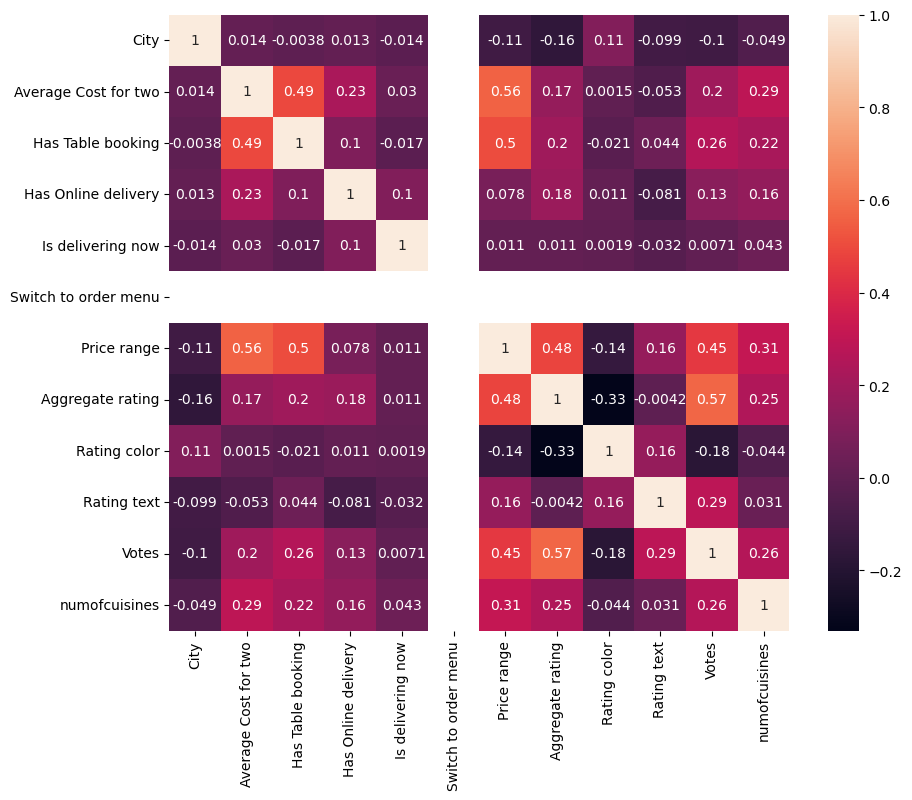

In [146]:
# PLOTTING A HEATMAP TO CHECK FOR CORRELATION

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
# # INSIGHTS

# 1. Price range, Votes, Rating color, NumofCuisines, Has Table Booking, Has Online delivery, Average cost for two and city 
# has been chosen as features as they have positive and correlation over 0.1
# 2. Is delivering now, Rating text and Switch to order menu have very less correlation so the features are being dropped

In [148]:
df.head()

City  Average Cost for two  Has Table booking  Has Online delivery  \
0    73                    73                  1                    0   
1    73                    75                  1                    0   
2    75                   113                  1                    0   
3    75                    81                  0                    0   
4    75                    81                  1                    0   

   Is delivering now  Switch to order menu  Price range  Aggregate rating  \
0                  0                     0            2                31   
1                  0                     0            2                28   
2                  0                     0            3                27   
3                  0                     0            3                32   
4                  0                     0            3                31   

   Rating color  Rating text  Votes  numofcuisines  
0             0            1    314              2  
1             0            1    545              0  
2             1            5    270              3  
3             0            1    362              1  
4             0            1    229              1

In [149]:
# CREATING X AND y VARIABLES

df.drop(['Rating text', 'Switch to order menu', 'Is delivering now'], axis =1, inplace = True)

In [150]:
df.head()

City  Average Cost for two  Has Table booking  Has Online delivery  \
0    73                    73                  1                    0   
1    73                    75                  1                    0   
2    75                   113                  1                    0   
3    75                    81                  0                    0   
4    75                    81                  1                    0   

   Price range  Aggregate rating  Rating color  Votes  numofcuisines  
0            2                31             0    314              2  
1            2                28             0    545              0  
2            3                27             1    270              3  
3            3                32             0    362              1  
4            3                31             0    229              1

In [152]:
feature = ['City','Average Cost for two','Has Table booking','Has Online delivery','Price range','Rating color','Votes','numofcuisines']

In [153]:
X = df[feature]
y = df['Aggregate rating']

In [154]:
X

City  Average Cost for two  Has Table booking  Has Online delivery  \
0       73                    73                  1                    0   
1       73                    75                  1                    0   
2       75                   113                  1                    0   
3       75                    81                  0                    0   
4       75                    81                  1                    0   
...    ...                   ...                ...                  ...   
9546   140                    16                  0                    0   
9547   140                    21                  0                    0   
9548   140                    29                  0                    0   
9549   140                    23                  0                    0   
9550   140                    11                  0                    0   

      Price range  Rating color  Votes  numofcuisines  
0               2             0    314              2  
1               2             0    545              0  
2               3             1    270              3  
3               3             0    362              1  
4               3             0    229              1  
...           ...           ...    ...            ...  
9546            2             1    663              0  
9547            2             1    755              2  
9548            3             5    585              1  
9549            3             1    714              0  
9550            1             1    545              0  

[9551 rows x 8 columns]

In [155]:
y

0       31
1       28
2       27
3       32
4       31
        ..
9546    24
9547    25
9548    20
9549    23
9550    23
Name: Aggregate rating, Length: 9551, dtype: int64

In [156]:
# Ensuring no null values in X 

X.isnull().sum()

City                    0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Price range             0
Rating color            0
Votes                   0
numofcuisines           0
dtype: int64

In [157]:
# FEATURE SCALING

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [159]:
X = sc.fit_transform(X)

In [160]:
X

array([[-0.22853276,  1.03797348,  2.69218148, ..., -1.97785894,
         0.98186481,  0.85606998],
       [-0.22853276,  1.1302174 ,  2.69218148, ..., -1.97785894,
         2.14134505, -0.97431381],
       [-0.14231731,  2.88285189,  2.69218148, ..., -1.30805322,
         0.76101143,  1.77126188],
       ...,
       [ 2.65968456, -0.99139276, -0.37144598, ...,  1.37116966,
         2.34212085, -0.05912191],
       [ 2.65968456, -1.26812453, -0.37144598, ..., -1.30805322,
         2.9896228 , -0.97431381],
       [ 2.65968456, -1.82158805, -0.37144598, ..., -1.30805322,
         2.14134505, -0.97431381]])

In [163]:
# SPLIT DATA SET INTO TRAIN TEST

from sklearn.model_selection import train_test_split

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

# LINEAR REGRESSION MODEL

In [167]:


from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()


In [170]:
lr_model.fit(X_train,y_train)

lr_pred=lr_model.predict(X_test)



In [171]:
from sklearn.metrics import r2_score

r2_score(y_test,lr_pred)

0.4524038497237022

In [ ]:
# Extremely poor r2score, its not even 50%. This is not the ideal model for prediction of aggregate rating

# DECISION TREE MODEL

In [175]:
from sklearn.tree import DecisionTreeRegressor


dt_model=DecisionTreeRegressor(min_samples_leaf=.0001)

dt_model.fit(X_train,y_train)

dt_pred=dt_model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,dt_pred)

0.928665841596179

In [ ]:
# This gives a high r2 score of 0.92 and therefore can be considered a good model

In [ ]:
# RANDOM FOREST REGRESSOR

In [178]:

from sklearn.ensemble import RandomForestRegressor

rf_model =RandomForestRegressor(n_estimators=500,random_state= 78,min_samples_leaf=.0001)

rf_model.fit(X_train,y_train)

rf_pred =rf_model.predict(X_test)


from sklearn.metrics import r2_score

r2_score(y_test,rf_pred)

0.9571717226886268

In [180]:
# The random forest model gives the highest r2 score 

SyntaxError: invalid syntax (779201739.py, line 1)

In [ ]:
# # INSIGHTS

# Out of the three models for regression, the best perfoming model was random forest regressor 
# and the least performing was the multiple linear regression model

# LEVEL 3: TASK 2 - CUSTOMER PREFERENCE ANALYSIS

In [ ]:
# Analyze the relationship between the type of cuisine and the restaurant's rating.

In [287]:
df7 = pd.DataFrame(df3.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False))

In [263]:
df7.head(25)

Aggregate rating
Cuisines                                               
Italian, Deli                                      4.90
Hawaiian, Seafood                                  4.90
American, Sandwich, Tea                            4.90
Continental, Indian                                4.90
European, Asian, Indian                            4.90
European, Contemporary                             4.90
European, German                                   4.90
BBQ, Breakfast, Southern                           4.90
American, Coffee and Tea                           4.90
Sunda, Indonesian                                  4.90
American, Burger, Grill                            4.90
Mughlai, Lucknowi                                  4.90
Mexican, American, Healthy Food                    4.90
American, Caribbean, Seafood                       4.90
Burger, Bar Food, Steak                            4.90
Italian, Bakery, Continental                       4.90
World Cuisine                                      4.90
American, BBQ, Sandwich                            4.90
Filipino, Mexican                                  4.85
Italian, American, Pizza                           4.80
French, Japanese, Desserts                         4.80
Contemporary, Italian                              4.80
International, Italian, Southern                   4.80
European, Mediterranean, North Indian              4.80
Beverages, International                           4.80

In [262]:
# INSIGHTS

# 1. The top rating goes for Italian, Indiam, American , continental, North indian, Chinese, Fast food, Mughalai
# 2. Thought the top cusines consumed is North indian, the cuisines with top rating are not just North indian

North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

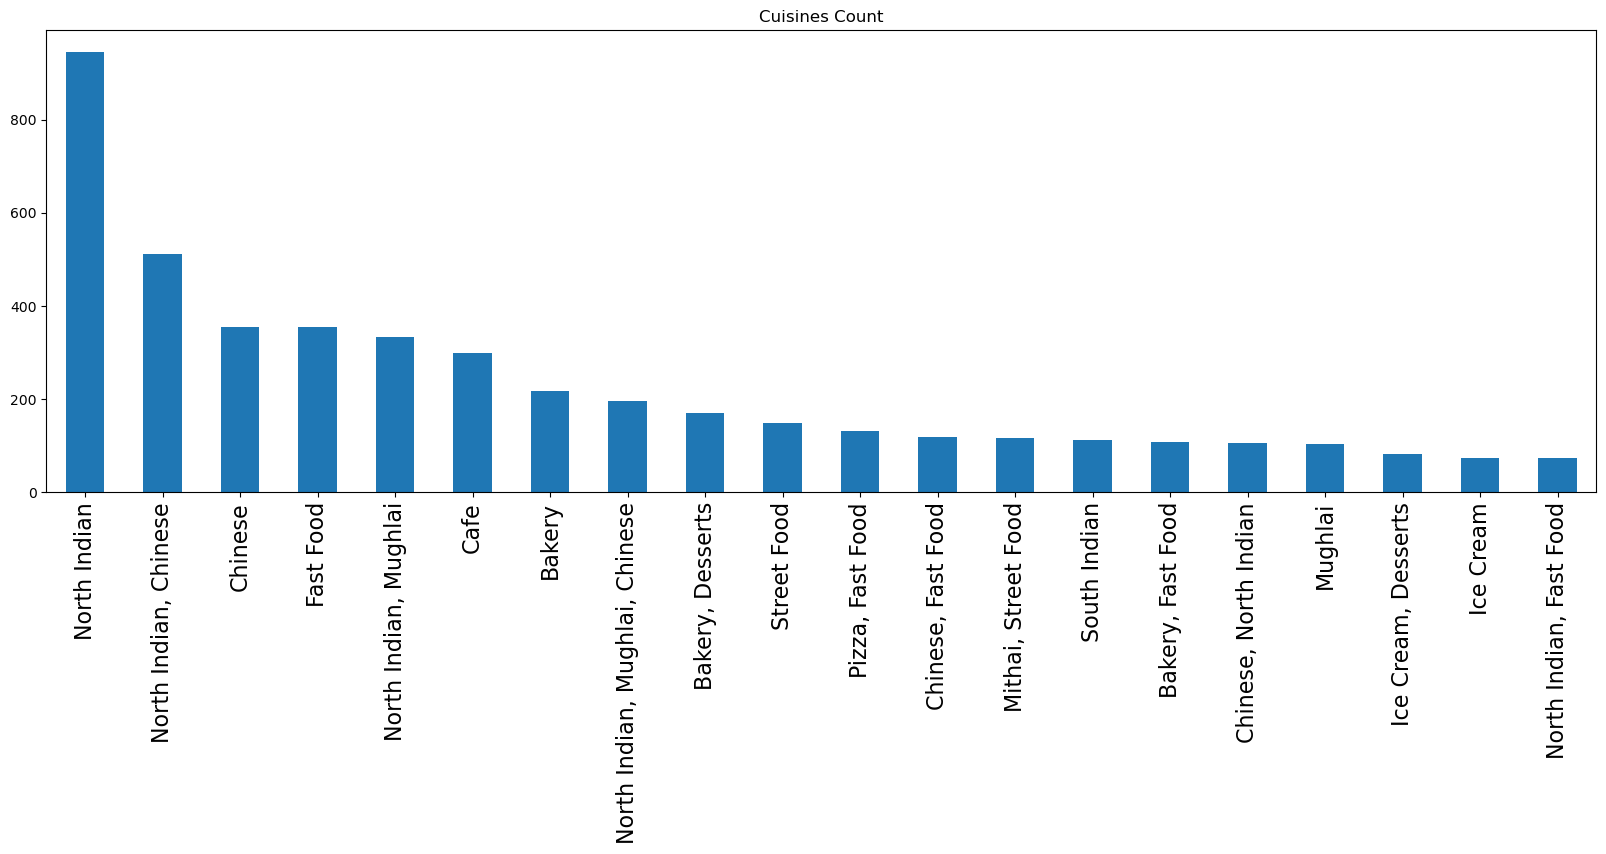

In [267]:
# TOP 20 Cuisines

plt.figure(figsize = (20,6))
df3['Cuisines'].value_counts().head(20).plot(kind = 'bar')
plt.title('Cuisines', fontsize = 16)
plt.xticks(rotation = 90, fontsize = 16)
plt.title ('Cuisines Count')
plt.show()


# INSIGHTS

# 1. North Indian ranks first
# 2. CHINESE, Fast Food, Cafe and Bakery ranks in top 6 
# 3. Street Food ranks 10 
# 4. Pizza ranks 11


# Top Cuisine is North Indian Food

In [273]:
# Identify the most popular cuisines among customers based on the number of votes.


Top_Cuisines = pd.DataFrame(df3.groupby('Cuisines')['Votes'].size().sort_values(ascending = False)).reset_index()

# The top cuisines based on number of votes are North indian, Chinese, Chinese fast food, Mughalai etc

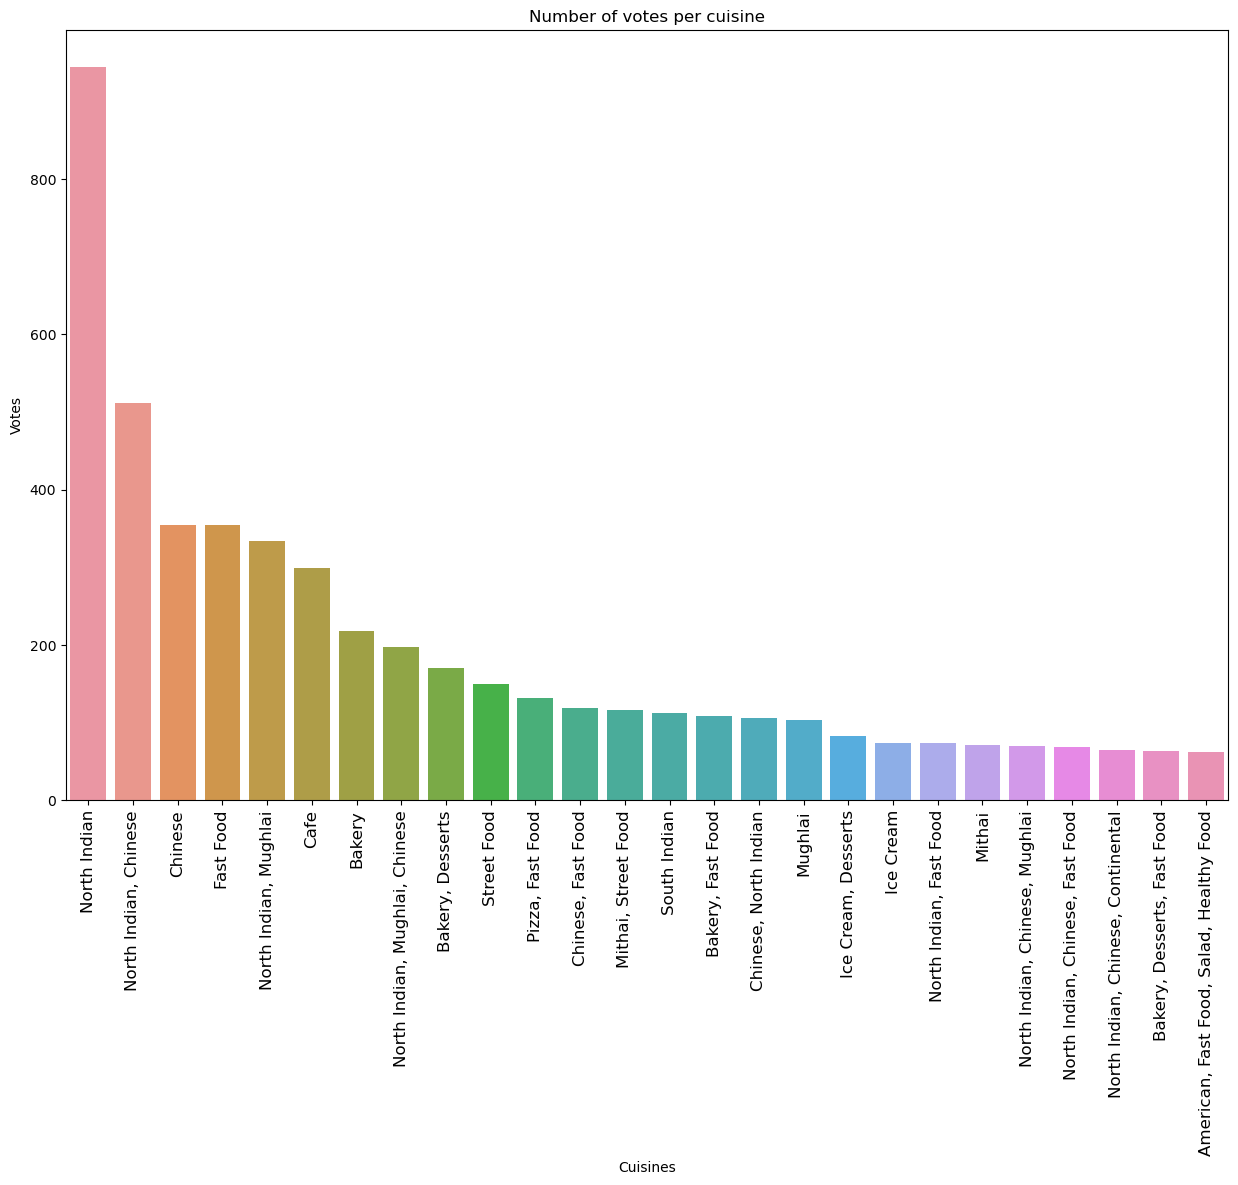

In [285]:
Top_Cuisines2 = Top_Cuisines[:26]

plt.figure(figsize = (15,10))
sns.barplot(x = 'Cuisines', y = 'Votes', data = Top_Cuisines2 )
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Number of votes per cuisine')
plt.show()

In [302]:
df8 = pd.DataFrame(df3.groupby('Cuisines')['Aggregate rating'].max().sort_values(ascending = False))
df8.iloc[:50]

# INSIGHTS

# Indian ,Asina, American , North Indian, Chinese, Japanese, Mexican 
# have all been featured multiple times in top 50 with rating of 4.9

Aggregate rating
Cuisines                                               
Brazilian, Bar Food                                 4.9
American, Sandwich, Tea                             4.9
European, German                                    4.9
Chinese                                             4.9
North Indian, South Indian, Mughlai                 4.9
European, Contemporary                              4.9
Burger                                              4.9
Indian, North Indian                                4.9
European, Asian, Indian                             4.9
Mexican, American, Healthy Food                     4.9
Burger, Bar Food, Steak                             4.9
Continental, Indian                                 4.9
Steak                                               4.9
British                                             4.9
Sunda, Indonesian                                   4.9
Sushi, Japanese                                     4.9
Desserts                                            4.9
Taiwanese, Street Food                              4.9
Asian                                               4.9
Modern Indian                                       4.9
American, Coffee and Tea                            4.9
Italian, Bakery, Continental                        4.9
North Indian, Chinese, Mediterranean                4.9
BBQ, Breakfast, Southern                            4.9
Pizza, Sandwich                                     4.9
North Indian, Chinese                               4.9
Cafe                                                4.9
Bakery, Desserts                                    4.9
Fast Food                                           4.9
North Indian                                        4.9
French                                              4.9
International                                       4.9
Sandwich, Seafood, Cajun                            4.9
European, Mediterranean, North Indian               4.9
Filipino, Mexican                                   4.9
Seafood                                             4.9
Mughlai, Lucknowi                                   4.9
Italian, Deli                                       4.9
Tapas                                               4.9
Bar Food                                            4.9
American, Burger, Grill                             4.9
Ice Cream                                           4.9
American, BBQ, Sandwich                             4.9
Japanese                                            4.9
American, Caribbean, Seafood                        4.9
World Cuisine                                       4.9
Cafe, North Indian, Chinese                         4.9
North Indian, European, Mediterranean               4.9
Indian                                              4.9
Japanese, Sushi                                     4.9

In [ ]:
# LEVEL 3: TASK 3 - Data Visualization

# 1.Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

# BAR CHART

In [304]:
# GROUP BY AGGREGATE RATING and renaming the new column as Rating for individual visualisation

df3.groupby('Aggregate rating').size().reset_index()
num_rating = df3.groupby('Aggregate rating').size().reset_index().rename(columns={0:'Rating Count'})
num_rating



Aggregate rating  Rating Count
0                0.0          2148
1                1.8             1
2                1.9             2
3                2.0             7
4                2.1            15
5                2.2            27
6                2.3            47
7                2.4            87
8                2.5           110
9                2.6           191
10               2.7           250
11               2.8           315
12               2.9           381
13               3.0           468
14               3.1           519
15               3.2           522
16               3.3           483
17               3.4           498
18               3.5           480
19               3.6           458
20               3.7           427
21               3.8           400
22               3.9           335
23               4.0           266
24               4.1           274
25               4.2           221
26               4.3           174
27               4.4           144
28               4.5            95
29               4.6            78
30               4.7            42
31               4.8            25
32               4.9            61

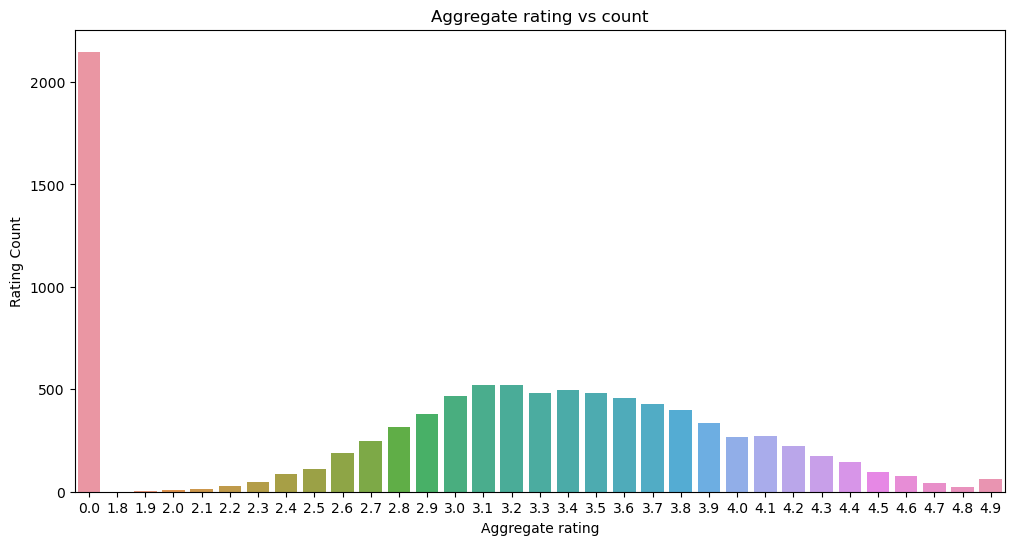

In [305]:
plt.figure(figsize = (12,6))
sns.barplot(x= 'Aggregate rating', y='Rating Count', data= num_rating)
plt.title('Aggregate rating vs count')
plt.show()

In [ ]:
# INFERENCE:
    
# # 1. Rating 0 has the highest count meaning lot out of 9550 rows, 2148 have no ratings.
# 2.20% of the restaurants have 0 rating
# 3.Out of the six classes there are no values in the 0-1 range at all
# 4. 2-3% of ratings are between 1-2 range
# 5. Most of the restaurants are rated between 3-4 about 40% 
# 6. 20% of restaurants are rated 2-3
# 7. 10% of restaurants are rated 4-5 

# There is huge imbalance in the target classes as two classes have 0-2% ratings 
# whilst three classes have 80% of rating 

# Histogram

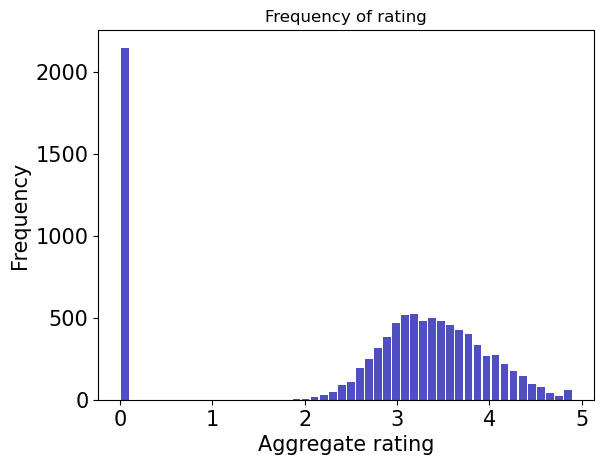

In [313]:
plt.hist(x = df3['Aggregate rating'], bins = 50, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.xlabel('Aggregate rating',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Frequency of rating')
plt.show()

# Compare the average ratings of different cities using appropriate visualizations.

In [329]:
# Grouping by City and rating in descending order of the average rating per city

City_rating = df3.groupby(['City'],as_index=False)['Aggregate rating'].mean().sort_values('Aggregate rating', ascending = False).reset_index()
City_rating



index              City  Aggregate rating
0       56        Inner City          4.900000
1      107       Quezon City          4.800000
2       73       Makati City          4.650000
3       95        Pasig City          4.633333
4       75  Mandaluyong City          4.625000
..     ...               ...               ...
136     88         New Delhi          2.438845
137     83         Montville          2.400000
138     78         Mc Millan          2.400000
139     89             Noida          2.036204
140     43         Faridabad          1.866932

[141 rows x 3 columns]

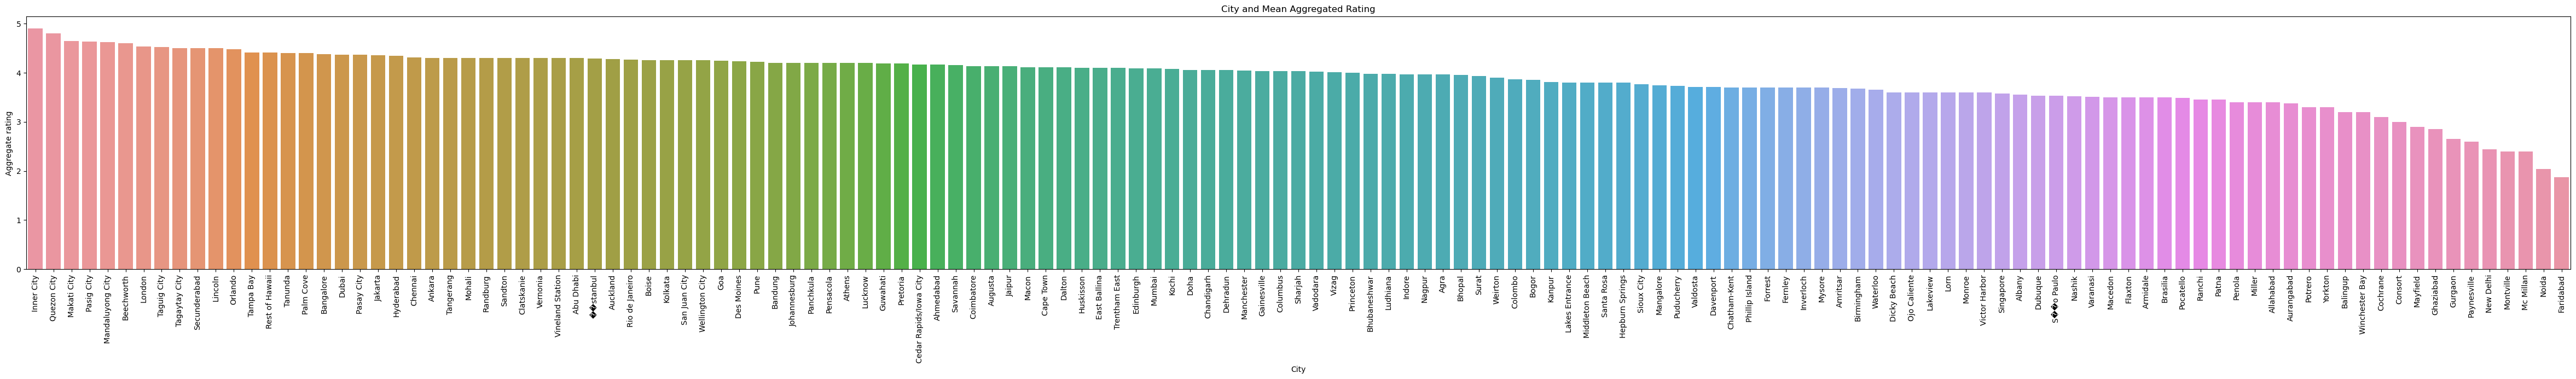

In [330]:
# Plotting city vs aggregated rating in descending order

plt.figure(figsize = (60,6))
sns.barplot(x= 'City', y= "Aggregate rating", data= City_rating)
plt.title('City and Aggregate Rating', fontsize = 16)
plt.xlabel('City')
plt.xticks(rotation = 90, fontsize = 10)
plt.title ("City and Mean Aggregated Rating")
plt.show()

# INSIGHTS

# 1.Inner city and some cities in Philipines top the list of highest ratings
# 2. London ranks top 7
# 3. Seconderabad is the only Indian city in top 10
# 4. Multiple Indian cities rank in top 255. 
# 5. New Delhi ranks 136 and is in the last 5 cities
# 6. Two other indian cities rank in last two - Noida and Faridabad with mean rating of 1.8 and 

# Visualize the relationship between various features and the target variable to gain insights.

In [ ]:
# I have already shown visualisation for a lot of numerical and categorical features in the beginning of this notebook
# More visualisation for other features are shown here

In [347]:
Rating_text = pd.DataFrame(df3.groupby(['Rating text'])['Aggregate rating'].size().sort_values(ascending = False))

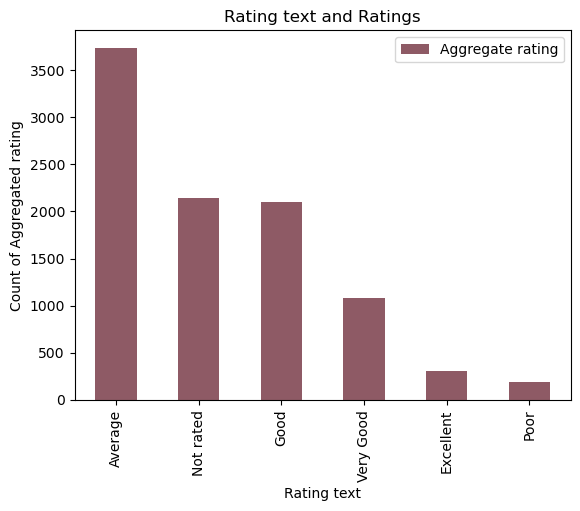

In [361]:
Rating_text.plot(kind = 'bar', color = '#8e5a65')
plt.title('Rating text and Ratings')
plt.ylabel('Count of Aggregated rating')
plt.show()

In [ ]:
# # INSIGHTS

# 1. Most of the ratings are Average
# 2. 20% of ratings are not rated by text
# 3. Poor ratings are the least in count


# AVERAGE COST FOR TWO VS RATING 

In [350]:
Cost = pd.DataFrame(df3.groupby(['Average Cost for two'])['Aggregate rating'].size().sort_values(ascending = False))

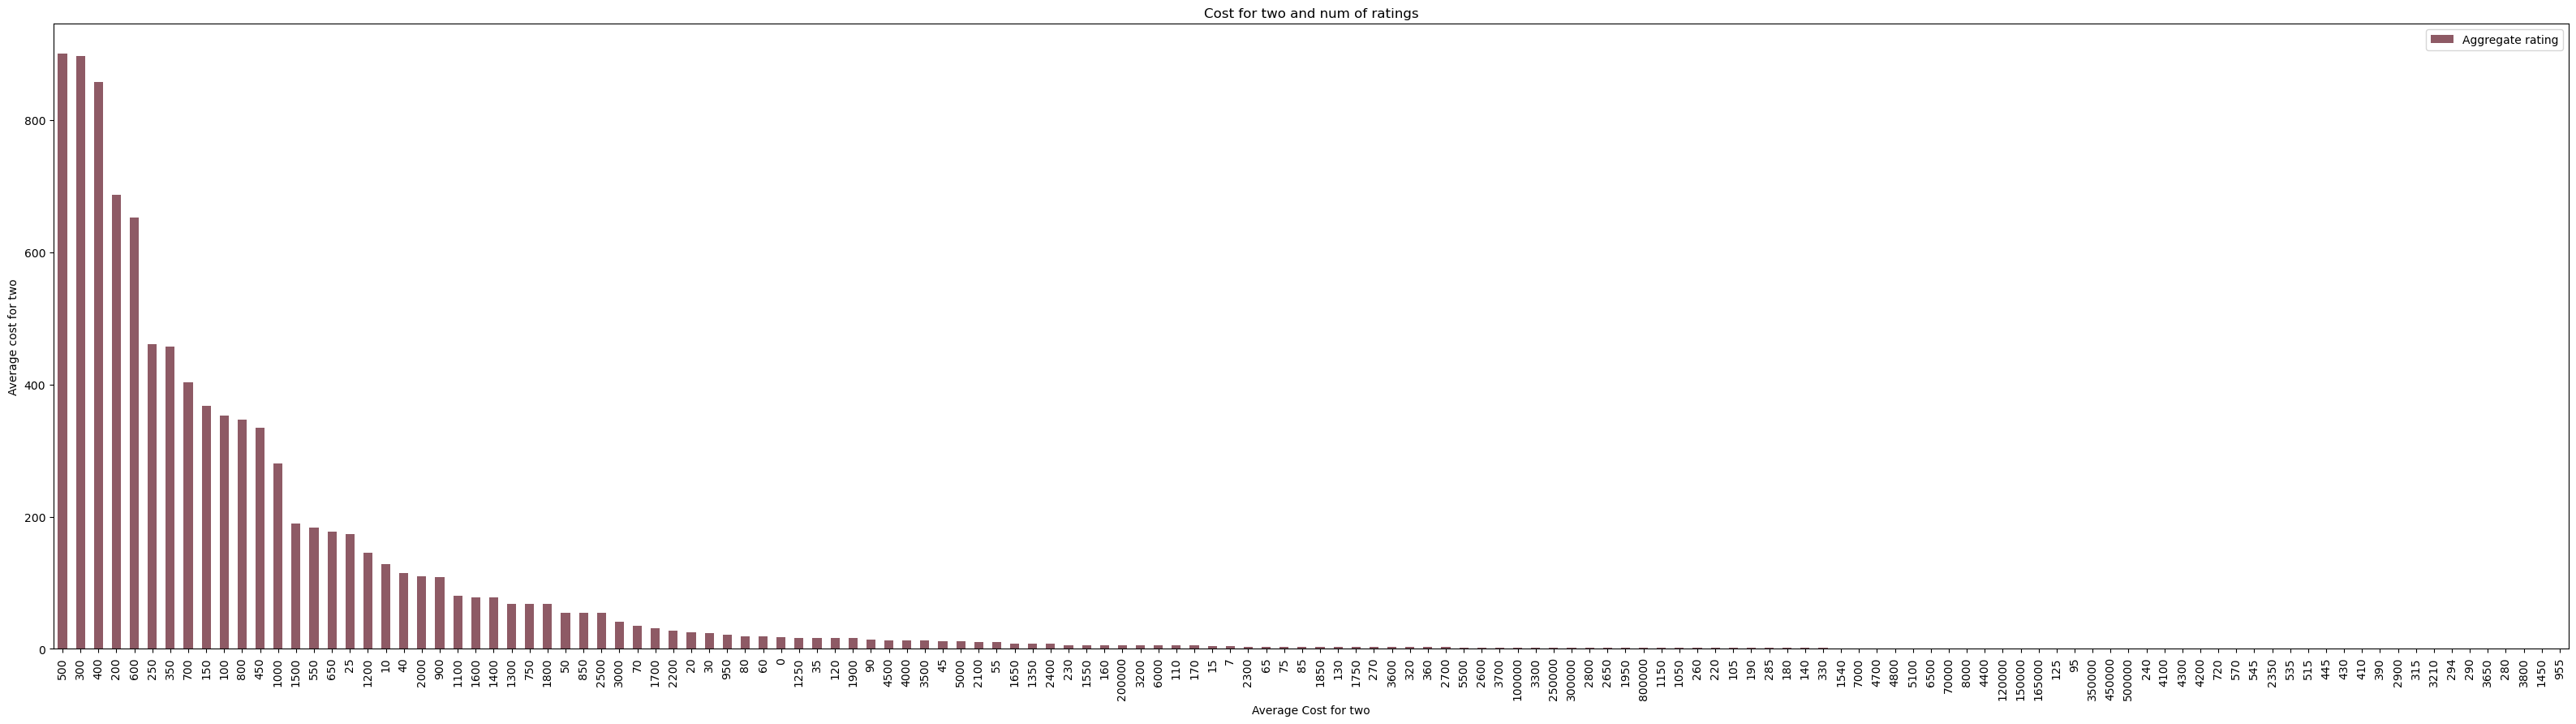

In [363]:
Cost.plot(kind = 'bar', color = '#8e5a65', figsize = (40,10))
plt.title('Cost for two and num of ratings')
plt.ylabel('Average cost for two')
plt.show()

# The plot shows the number of ratings received for every average cost for two

# Maximum number of occurences are for values under 1500 as average cost for two

In [ ]:
# CURRENCY AND RATING

In [354]:
Cur = pd.DataFrame(df3.groupby(['Currency'])['Aggregate rating'].size().sort_values(ascending = False))

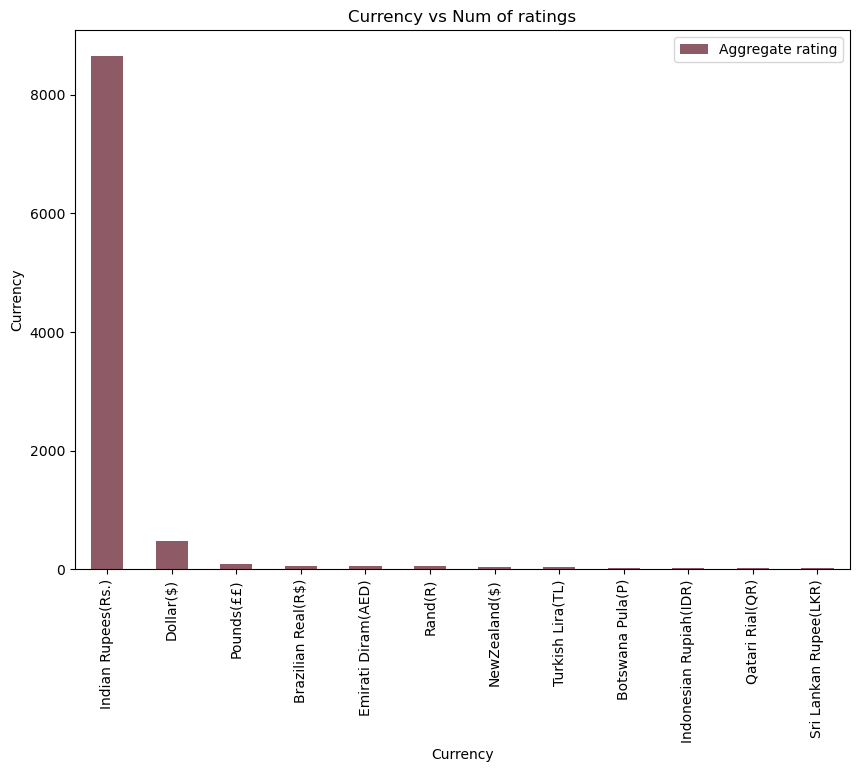

In [364]:
Cur.plot(kind = 'bar', color = '#8e5a65', figsize = (10,7))
plt.title('Currency vs Num of ratings')
plt.ylabel('Currency')
plt.show()

# Over 95% of the data is for Indian currency Rupee
# Less than 500 restaurant ratings are in Dollars

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776      